# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# write the code for reading the dataset INNHotelsGroup.csv
hotel_data = pd.read_csv(r'/content/drive/MyDrive/freelancedata/INNHotelsGroup.csv')
inn_data = hotel_data.copy()
print(inn_data)

      Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                   

## Data Overview

- Observations
- Sanity checks

In [ ]:
#checking the Shape of the Dataset
inn_data.shape

(36275, 19)

In [ ]:
#Looking at the data
inn_data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [ ]:
inn_data.tail(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36266,INN36267,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled
36267,INN36268,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled
36269,INN36270,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
inn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
inn_data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
inn_data.describe(include=object)

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


**let's drop the Booking_ID since it is unique to each row**

In [ ]:
# dropping the 'Booking ID' column
inn_data = inn_data.drop('Booking_ID', axis=1)

Let us also drop arrival year

In [ ]:
# dropping the 'Arrival Year' column
inn_data = inn_data.drop('arrival_year', axis=1)

Checking the unique value in each Object data type

In [ ]:
# Let's check the values in each object data types
categorical_col = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in categorical_col:
    print(inn_data[i].value_counts())
    print("")

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64



### Observations

*   There are 36275 rows and 19 columns in the dataset
*   5 cloumns are object data type
*   The booking_ID are unique to each row, there are 4 unique type_of_meal_plan, 7 unique room_type_reserved, 5 unique market_segment_type and 2 unique_status 
*   13 columns are integer
*   1 column is a float




## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

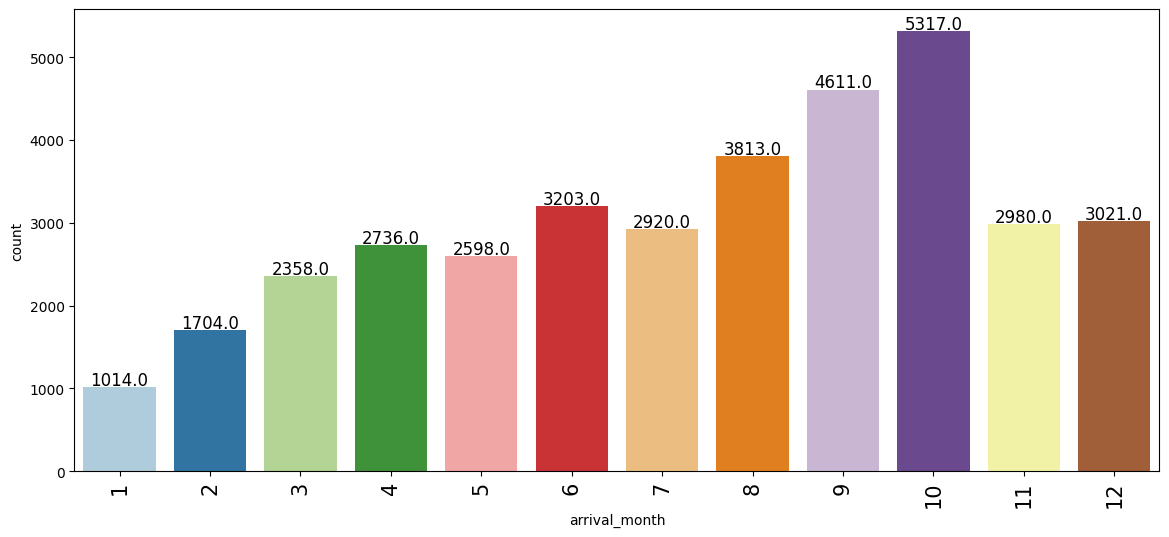

In [ ]:
labeled_barplot(inn_data, 'arrival_month', n=None)

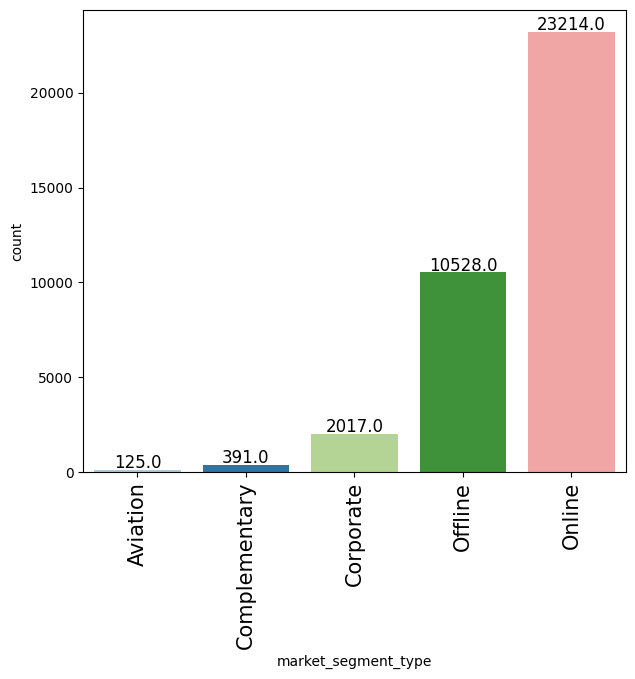

In [ ]:
labeled_barplot(inn_data, 'market_segment_type', perc=False, n=None)

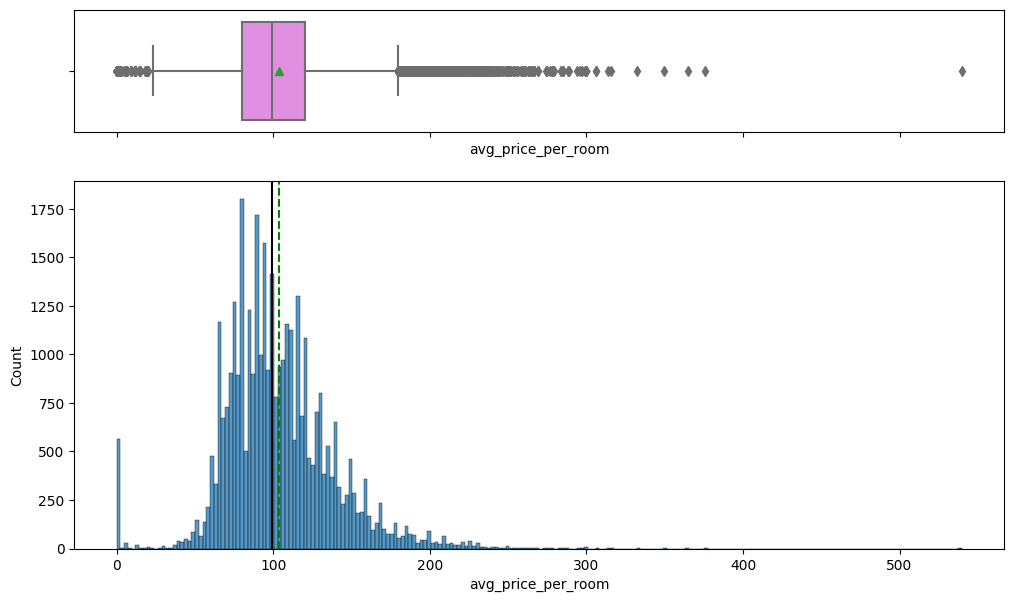

In [ ]:
histogram_boxplot(inn_data, 'avg_price_per_room')

In [ ]:
# how many free rooms does the hotel give away?
inn_data[inn_data['avg_price_per_room']==0] 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,8,9,Online,0,0,0,0.0,2,Not_Canceled


In [ ]:
inn_data.loc[inn_data['avg_price_per_room']==0, 'market_segment_type'].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

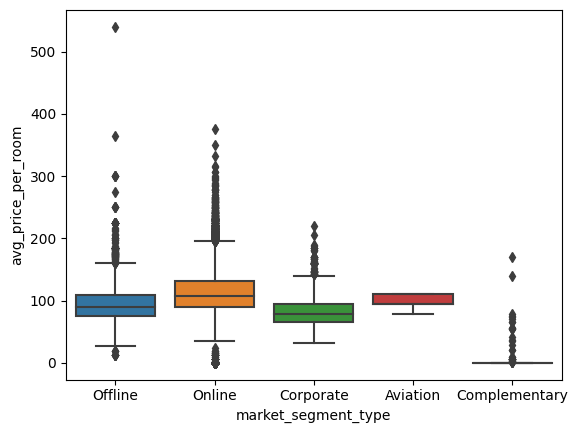

In [ ]:
sns.boxplot(data=inn_data, y='avg_price_per_room' , x='market_segment_type')

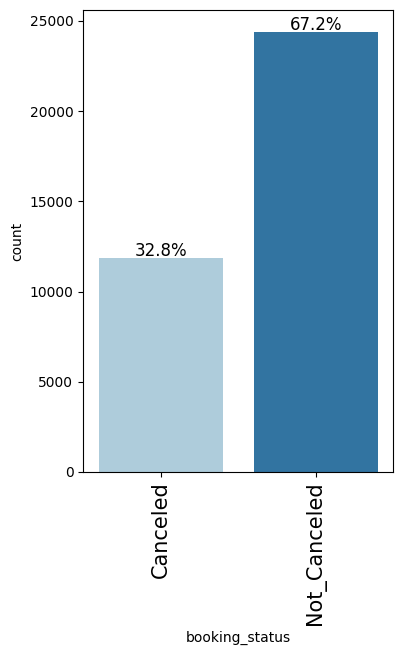

In [ ]:
labeled_barplot(inn_data, 'booking_status', perc=True, n=None)

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


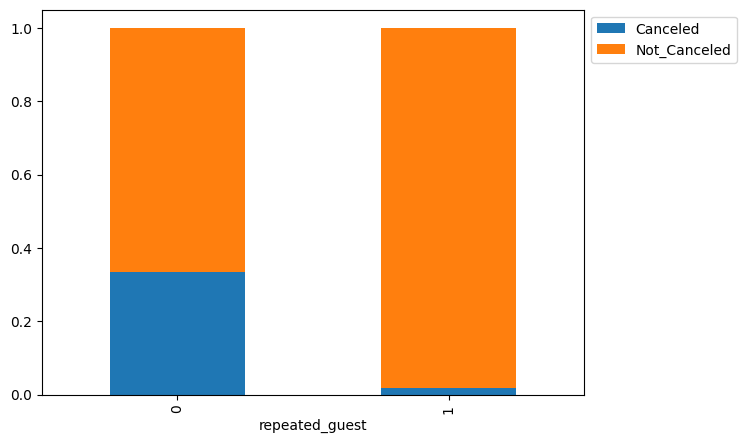

In [ ]:
stacked_barplot(inn_data,'repeated_guest','booking_status', perc=True)

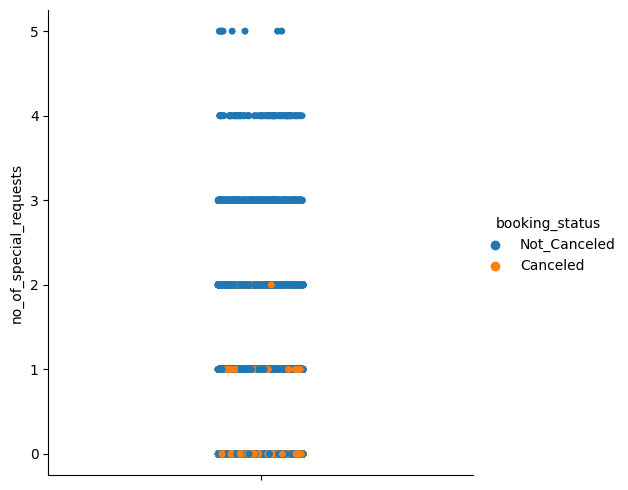

In [ ]:
sns.catplot(data=inn_data, y='no_of_special_requests', hue='booking_status')

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**Answers**:


1.   The month of october is the busiest with 5317 bookings.
2.   Most of the guests came from online market segment. About 23214 guests.
3.   The highest price is from the online follow by aviation. The complementary are free.
4.   32.8% of the bookings were cancelled.
5.   16 out of 914 bookings of repeated guest were cancelled. which is 1.75%
6.  When there is no special request cancellation increases. Special request reduces the number of cancellation.



Univariate Analysis

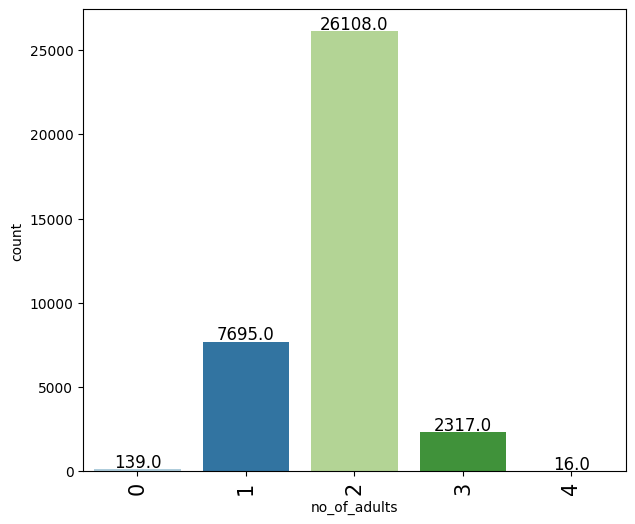

In [ ]:
labeled_barplot(inn_data, 'no_of_adults')

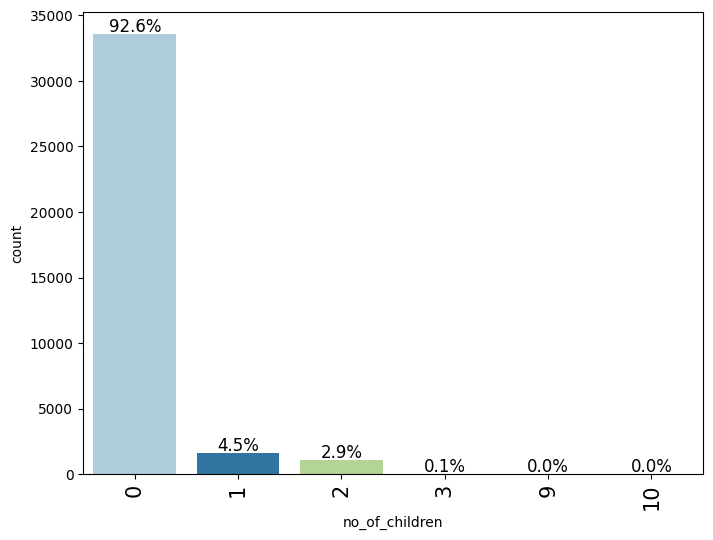

In [ ]:
labeled_barplot(inn_data, 'no_of_children', perc=True)

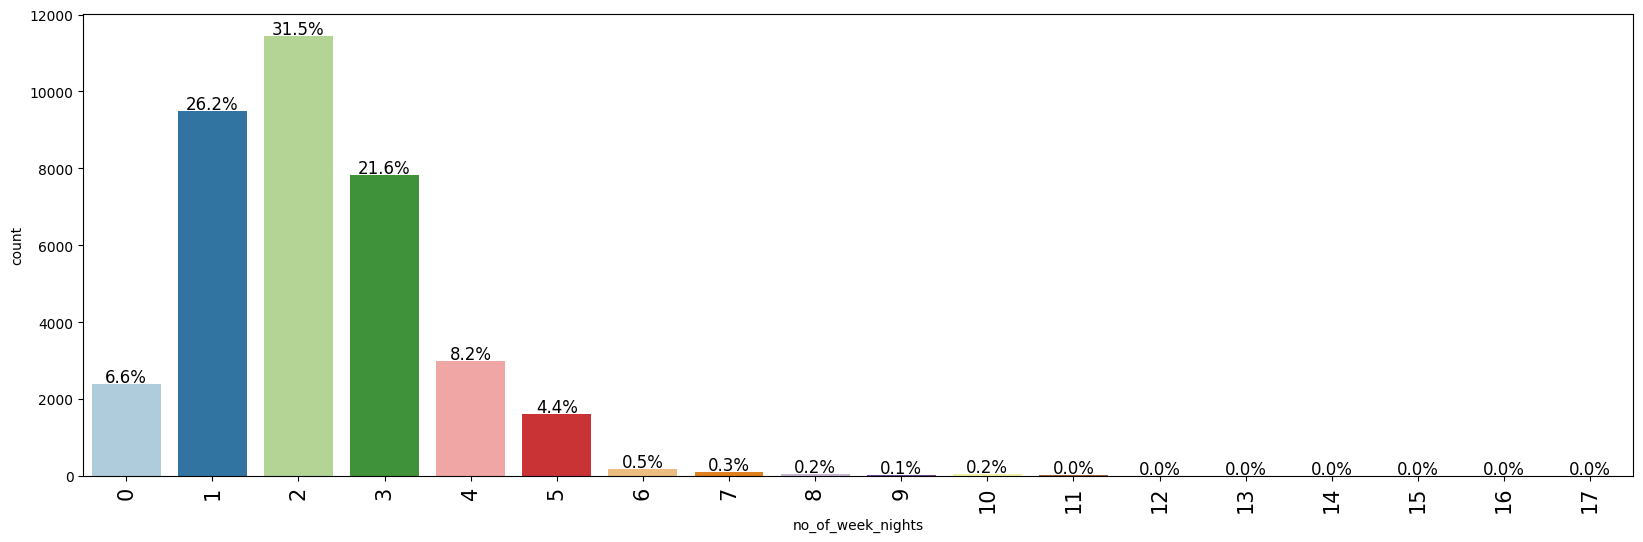

In [ ]:
labeled_barplot(inn_data, 'no_of_week_nights', perc=True)

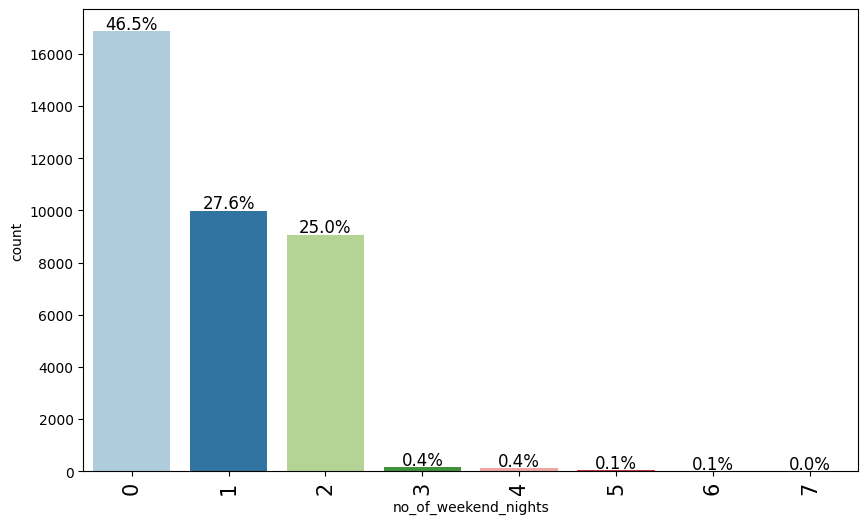

In [ ]:
labeled_barplot(inn_data, 'no_of_weekend_nights', perc=True)

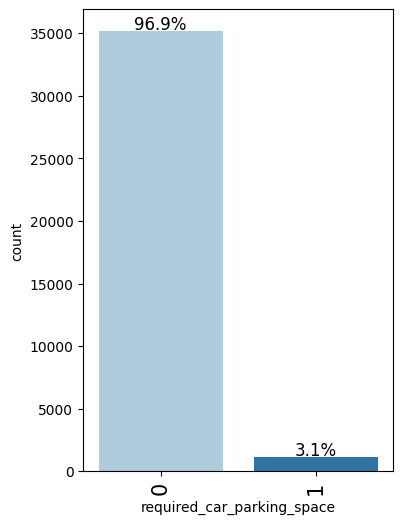

In [ ]:
labeled_barplot(inn_data, 'required_car_parking_space', perc=True)

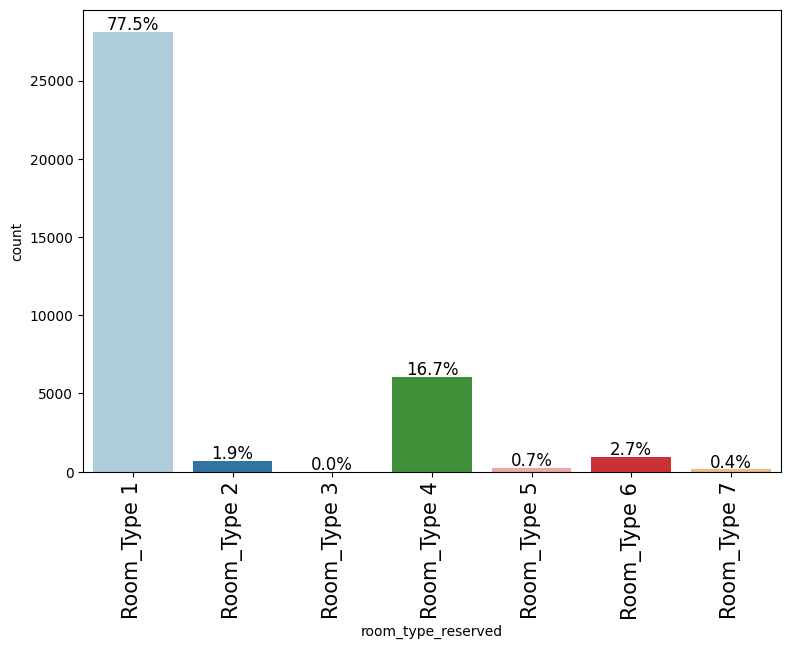

In [ ]:
labeled_barplot(inn_data, 'room_type_reserved', perc=True)

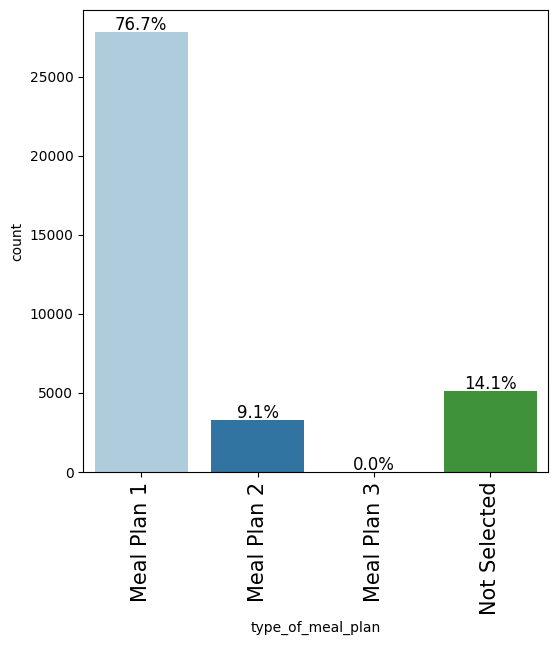

In [ ]:
labeled_barplot(inn_data, 'type_of_meal_plan', perc=True)

<Axes: xlabel='lead_time', ylabel='Count'>

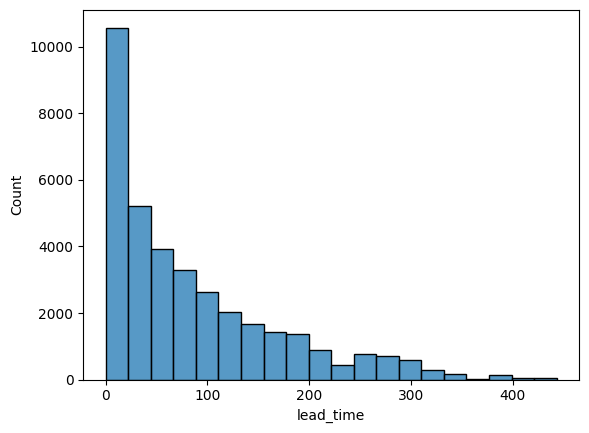

In [ ]:
sns.histplot(data=inn_data, x='lead_time', bins=20)

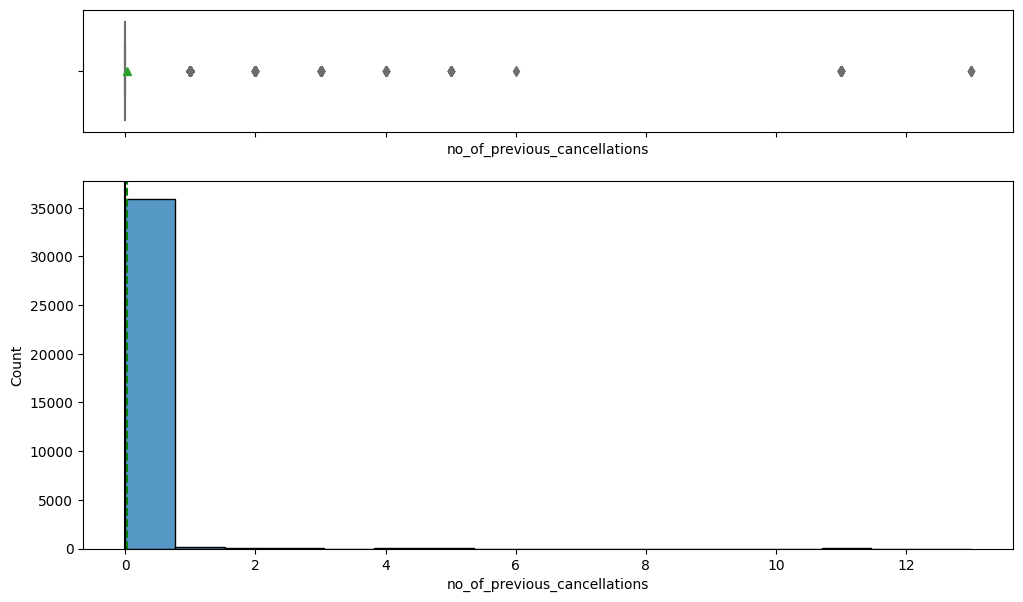

In [ ]:
histogram_boxplot(inn_data, 'no_of_previous_cancellations')

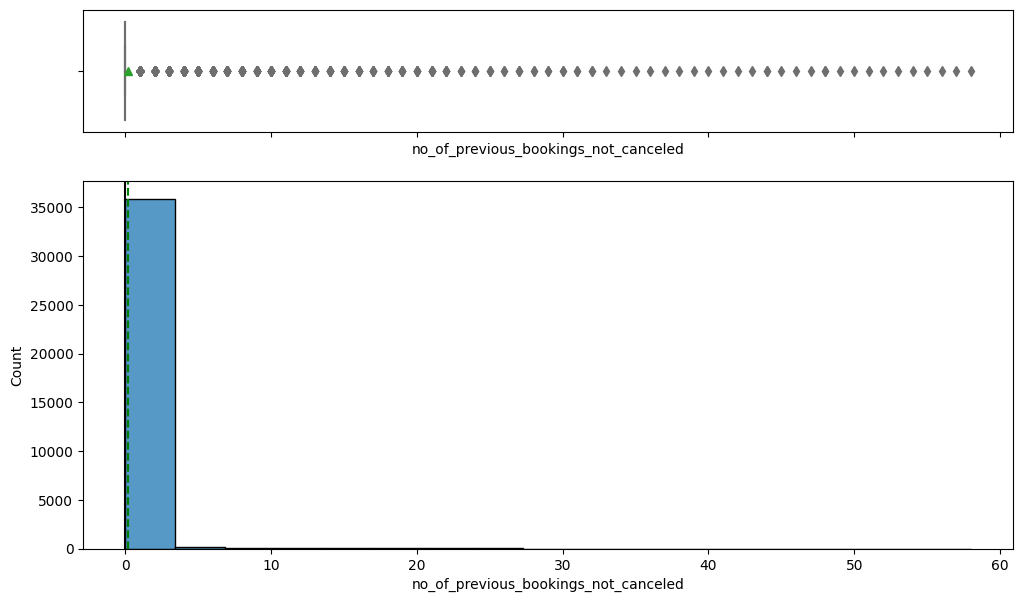

In [ ]:
histogram_boxplot(inn_data, 'no_of_previous_bookings_not_canceled')

Multivariate Analysis

<Axes: >

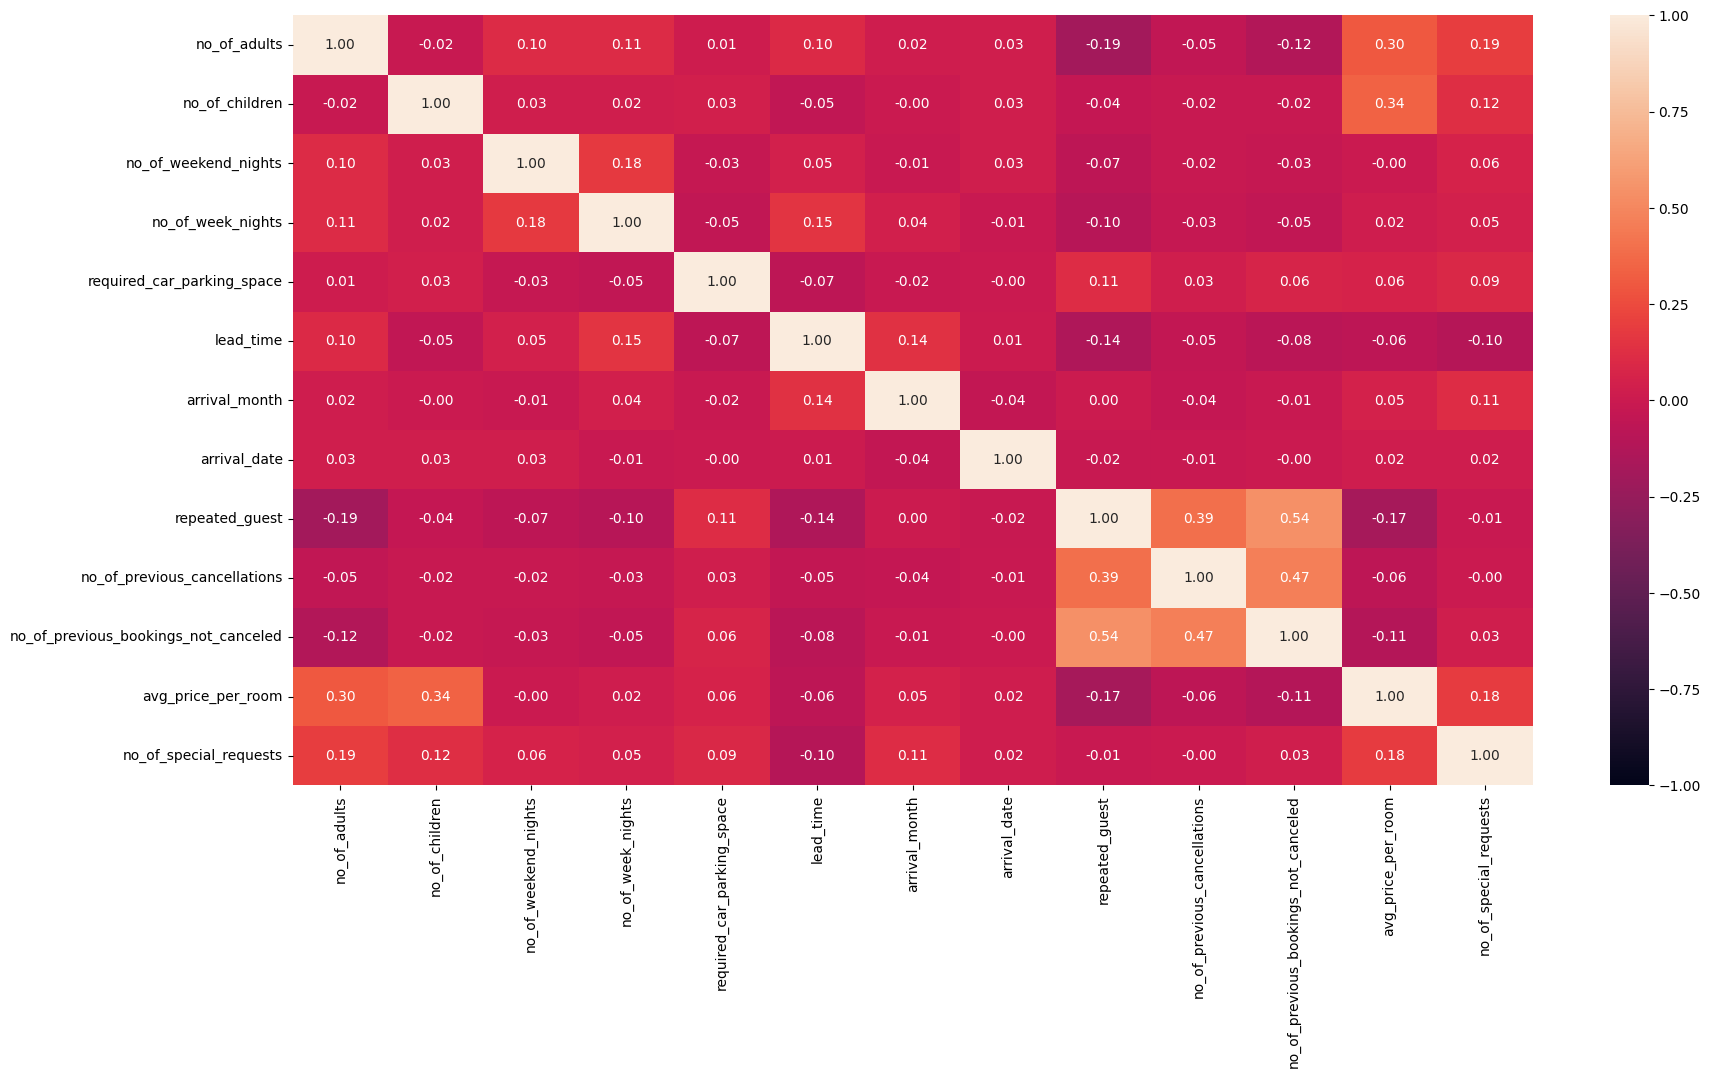

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(
inn_data.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

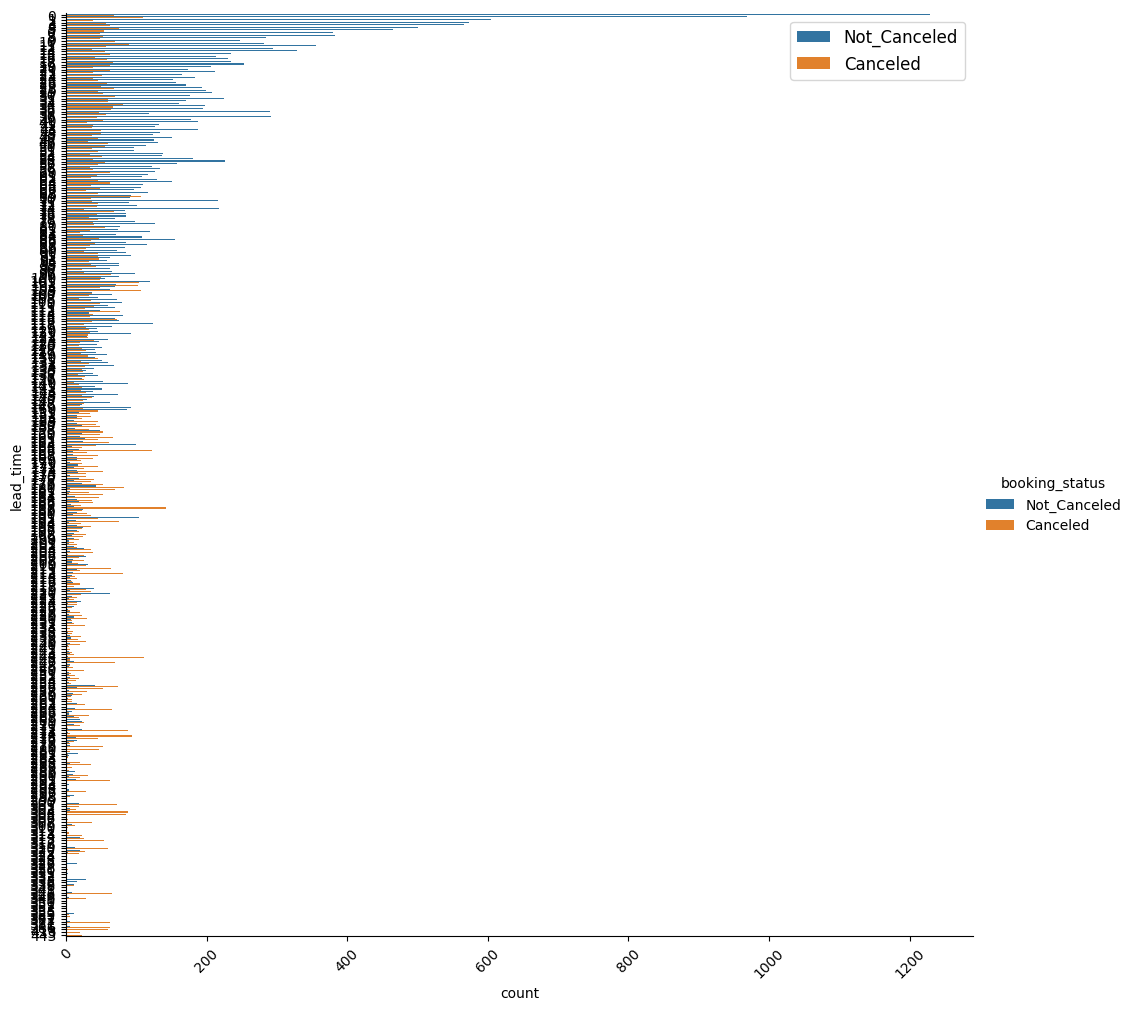

In [ ]:
# lead time vs cancellation

sns.catplot(data=inn_data, y='lead_time', hue='booking_status', kind='count',height=10)
plt.legend(fontsize='large', title_fontsize='x-large')
plt.xticks(rotation=45)
plt.show()

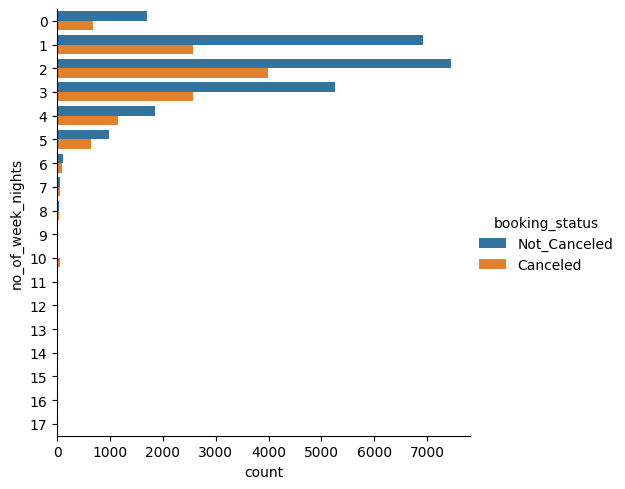

In [ ]:
# weekday vs cancelation
sns.catplot(data=inn_data, y='no_of_week_nights', hue='booking_status', kind='count' )
plt.show()


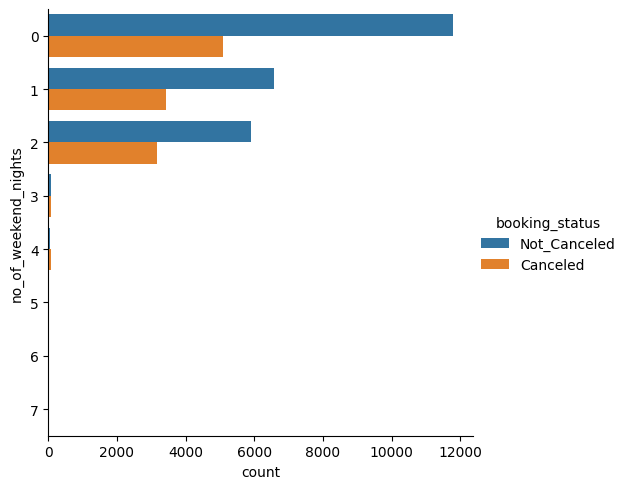

In [ ]:
# Weekend Vs Cancellation
sns.catplot(data=inn_data, y='no_of_weekend_nights', hue='booking_status', kind='count' )
plt.show()

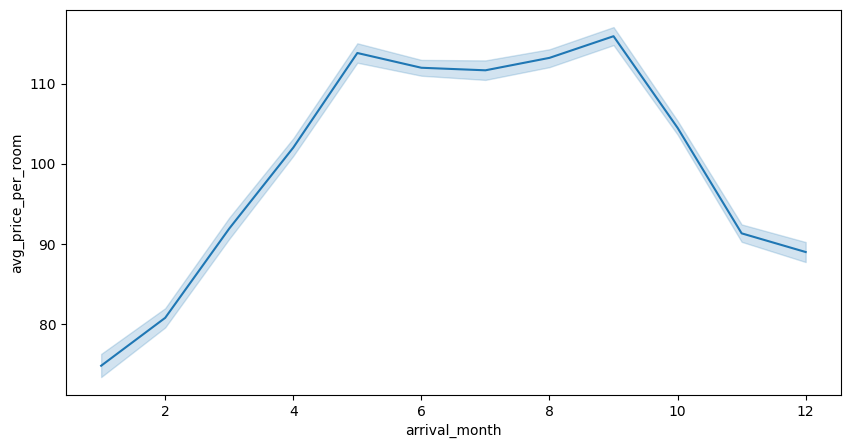

In [ ]:
# average price over the months 
plt.figure(figsize=(10, 5))
sns.lineplot(data=inn_data, x='arrival_month', y='avg_price_per_room')
plt.show()

Insight from the EDA

* Online booked rooms have the highest cost of booking.
* 72% of adults who book rooms have another adult staying with them.
* only 7.4% of booking are with children 
* Bookings with special request are less likely to cancel the reservation.
* August, September and October are the busiest months.
* Repeated guests are less likely to cancel their bookings
* 52.6% of bookings include at least one weekend night.
* 64% of bookings come from online sources.
* Only few of the guest request for parking space
* 90% of room type booked are type1 & type4.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

Checking for Duplicate value and Missing Value

In [ ]:
# checking for duplicate values
hotel_data[hotel_data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# Checking for missing Value
hotel_data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There is no missing value in the dataset

Before checking for outliers let's us extract the numeric columns

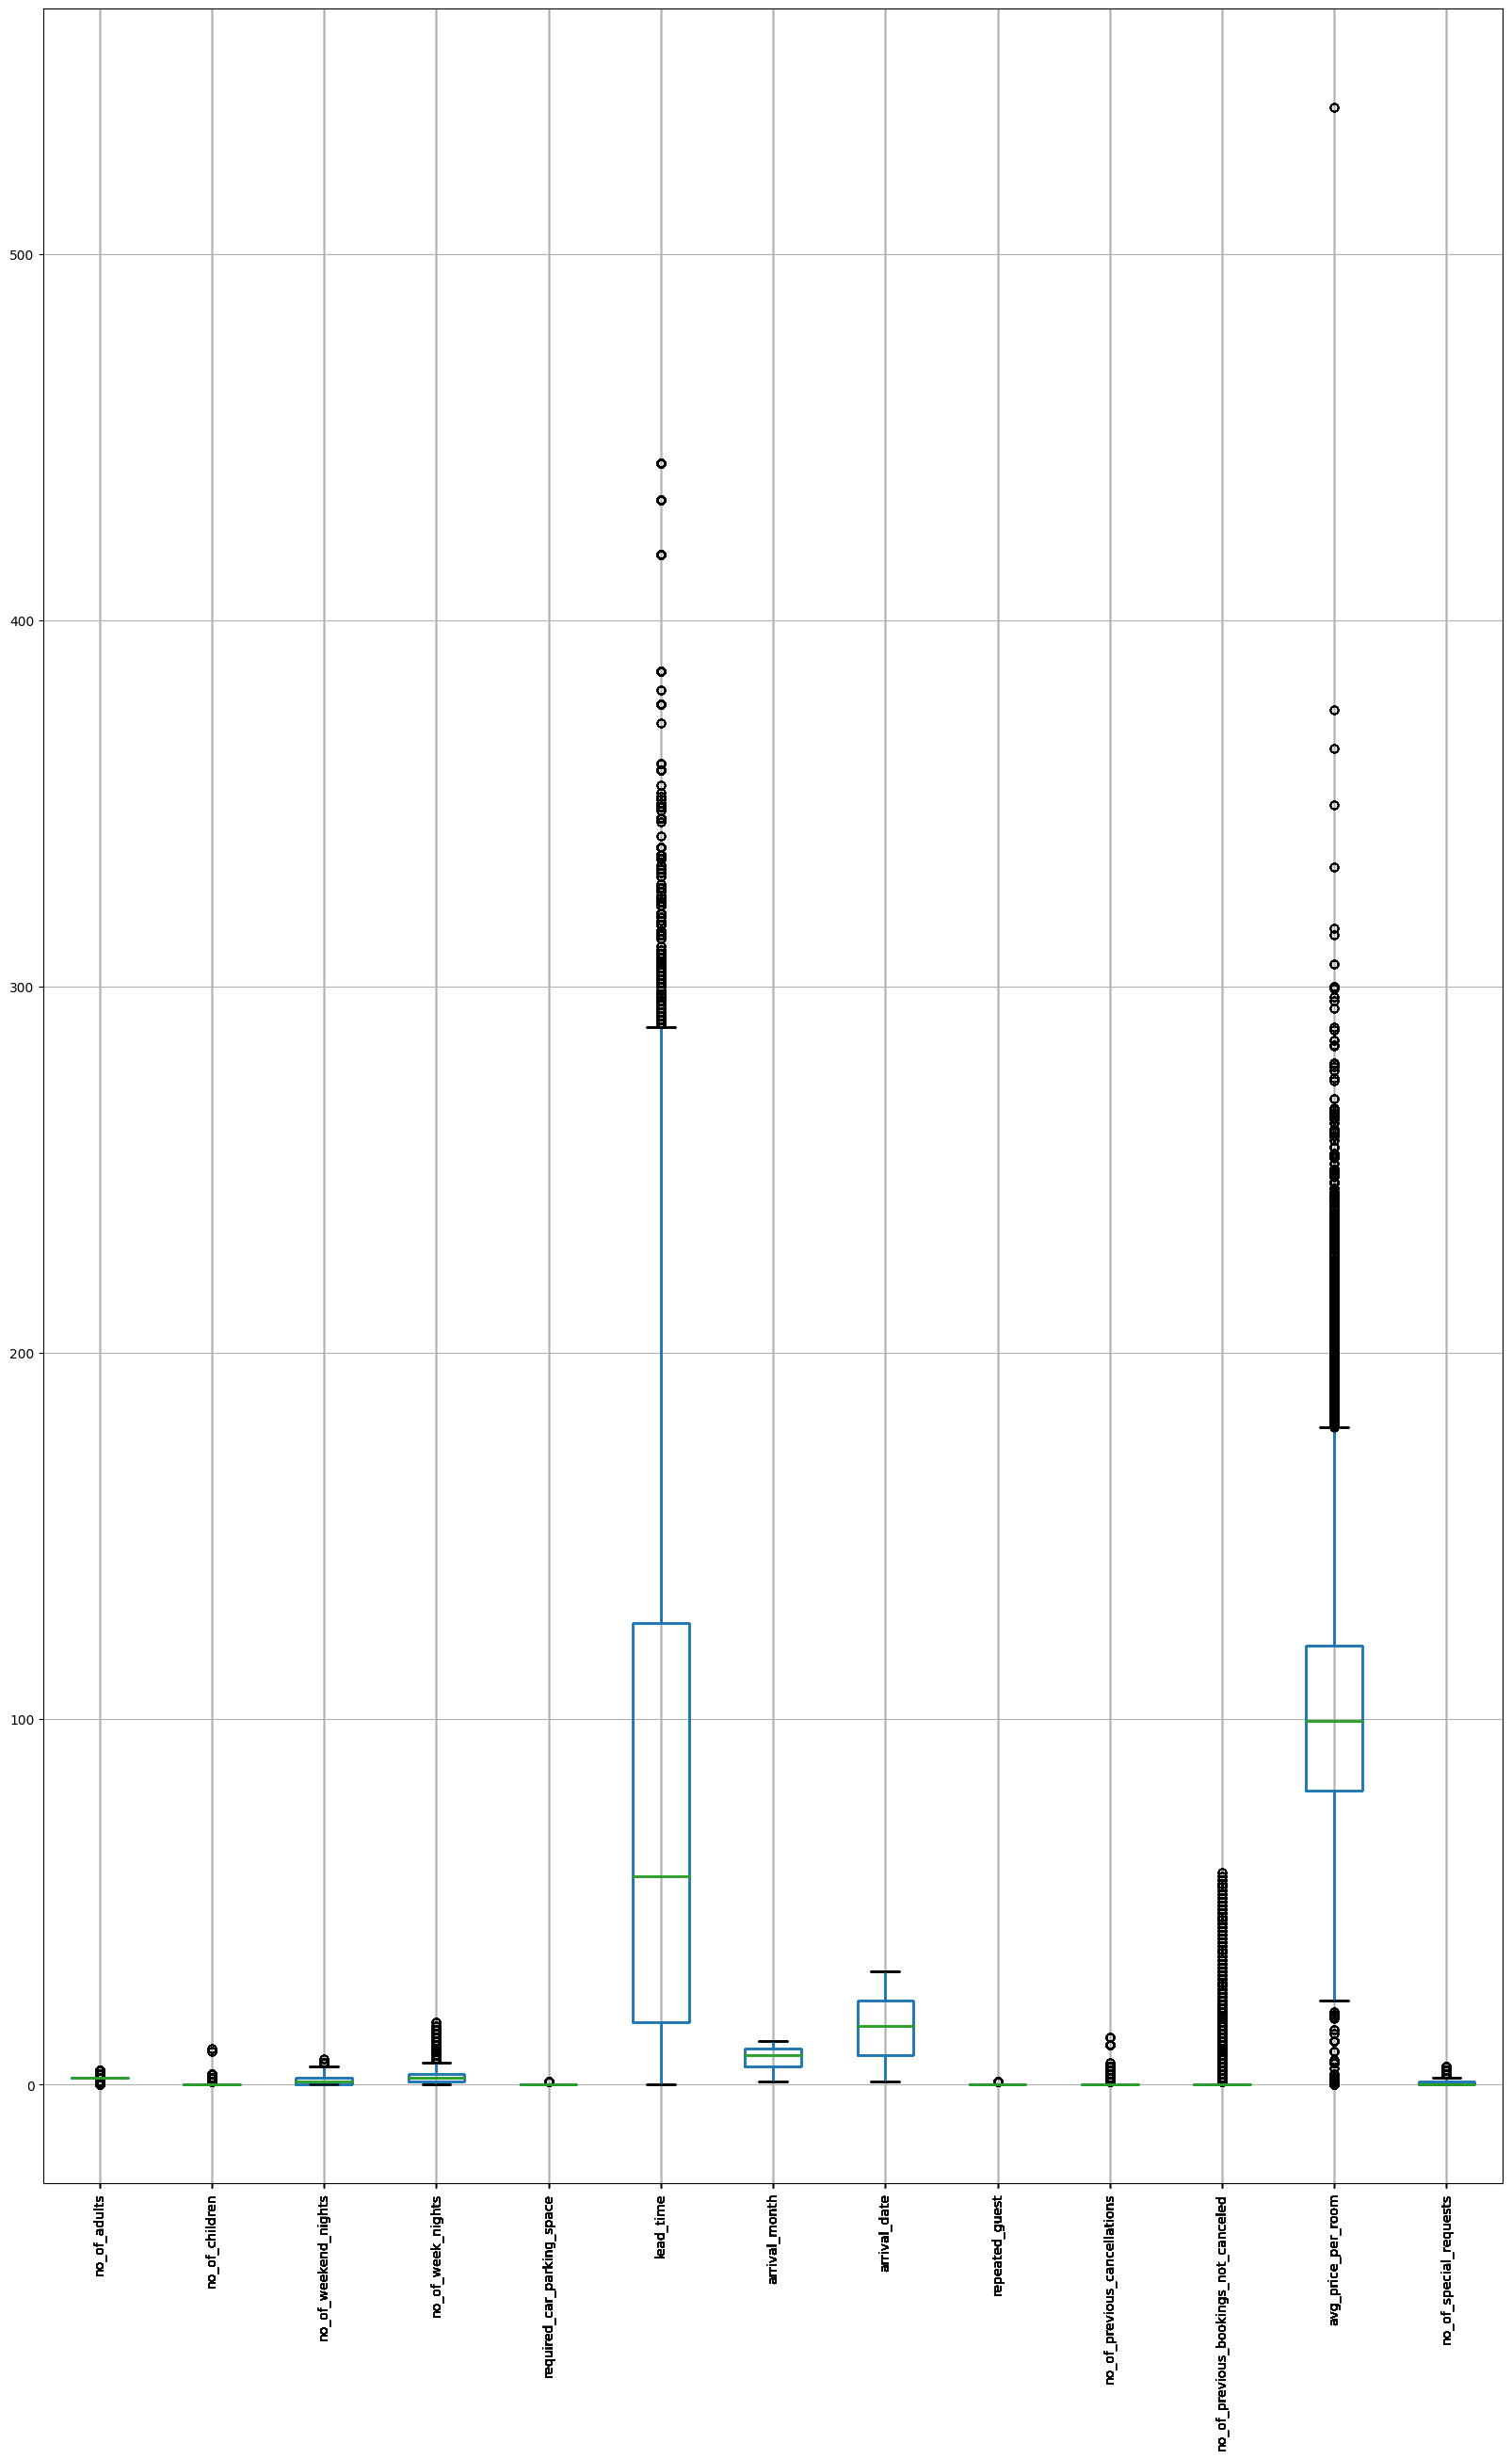

In [ ]:
numeric_columns = inn_data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    inn_data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
def treat_outliers(data, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker)

    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

I am going to treat only the lead_time and avg_price_per_room because they have the most obvious outliers

In [ ]:
df = treat_outliers_all(inn_data, ['lead_time','avg_price_per_room'])

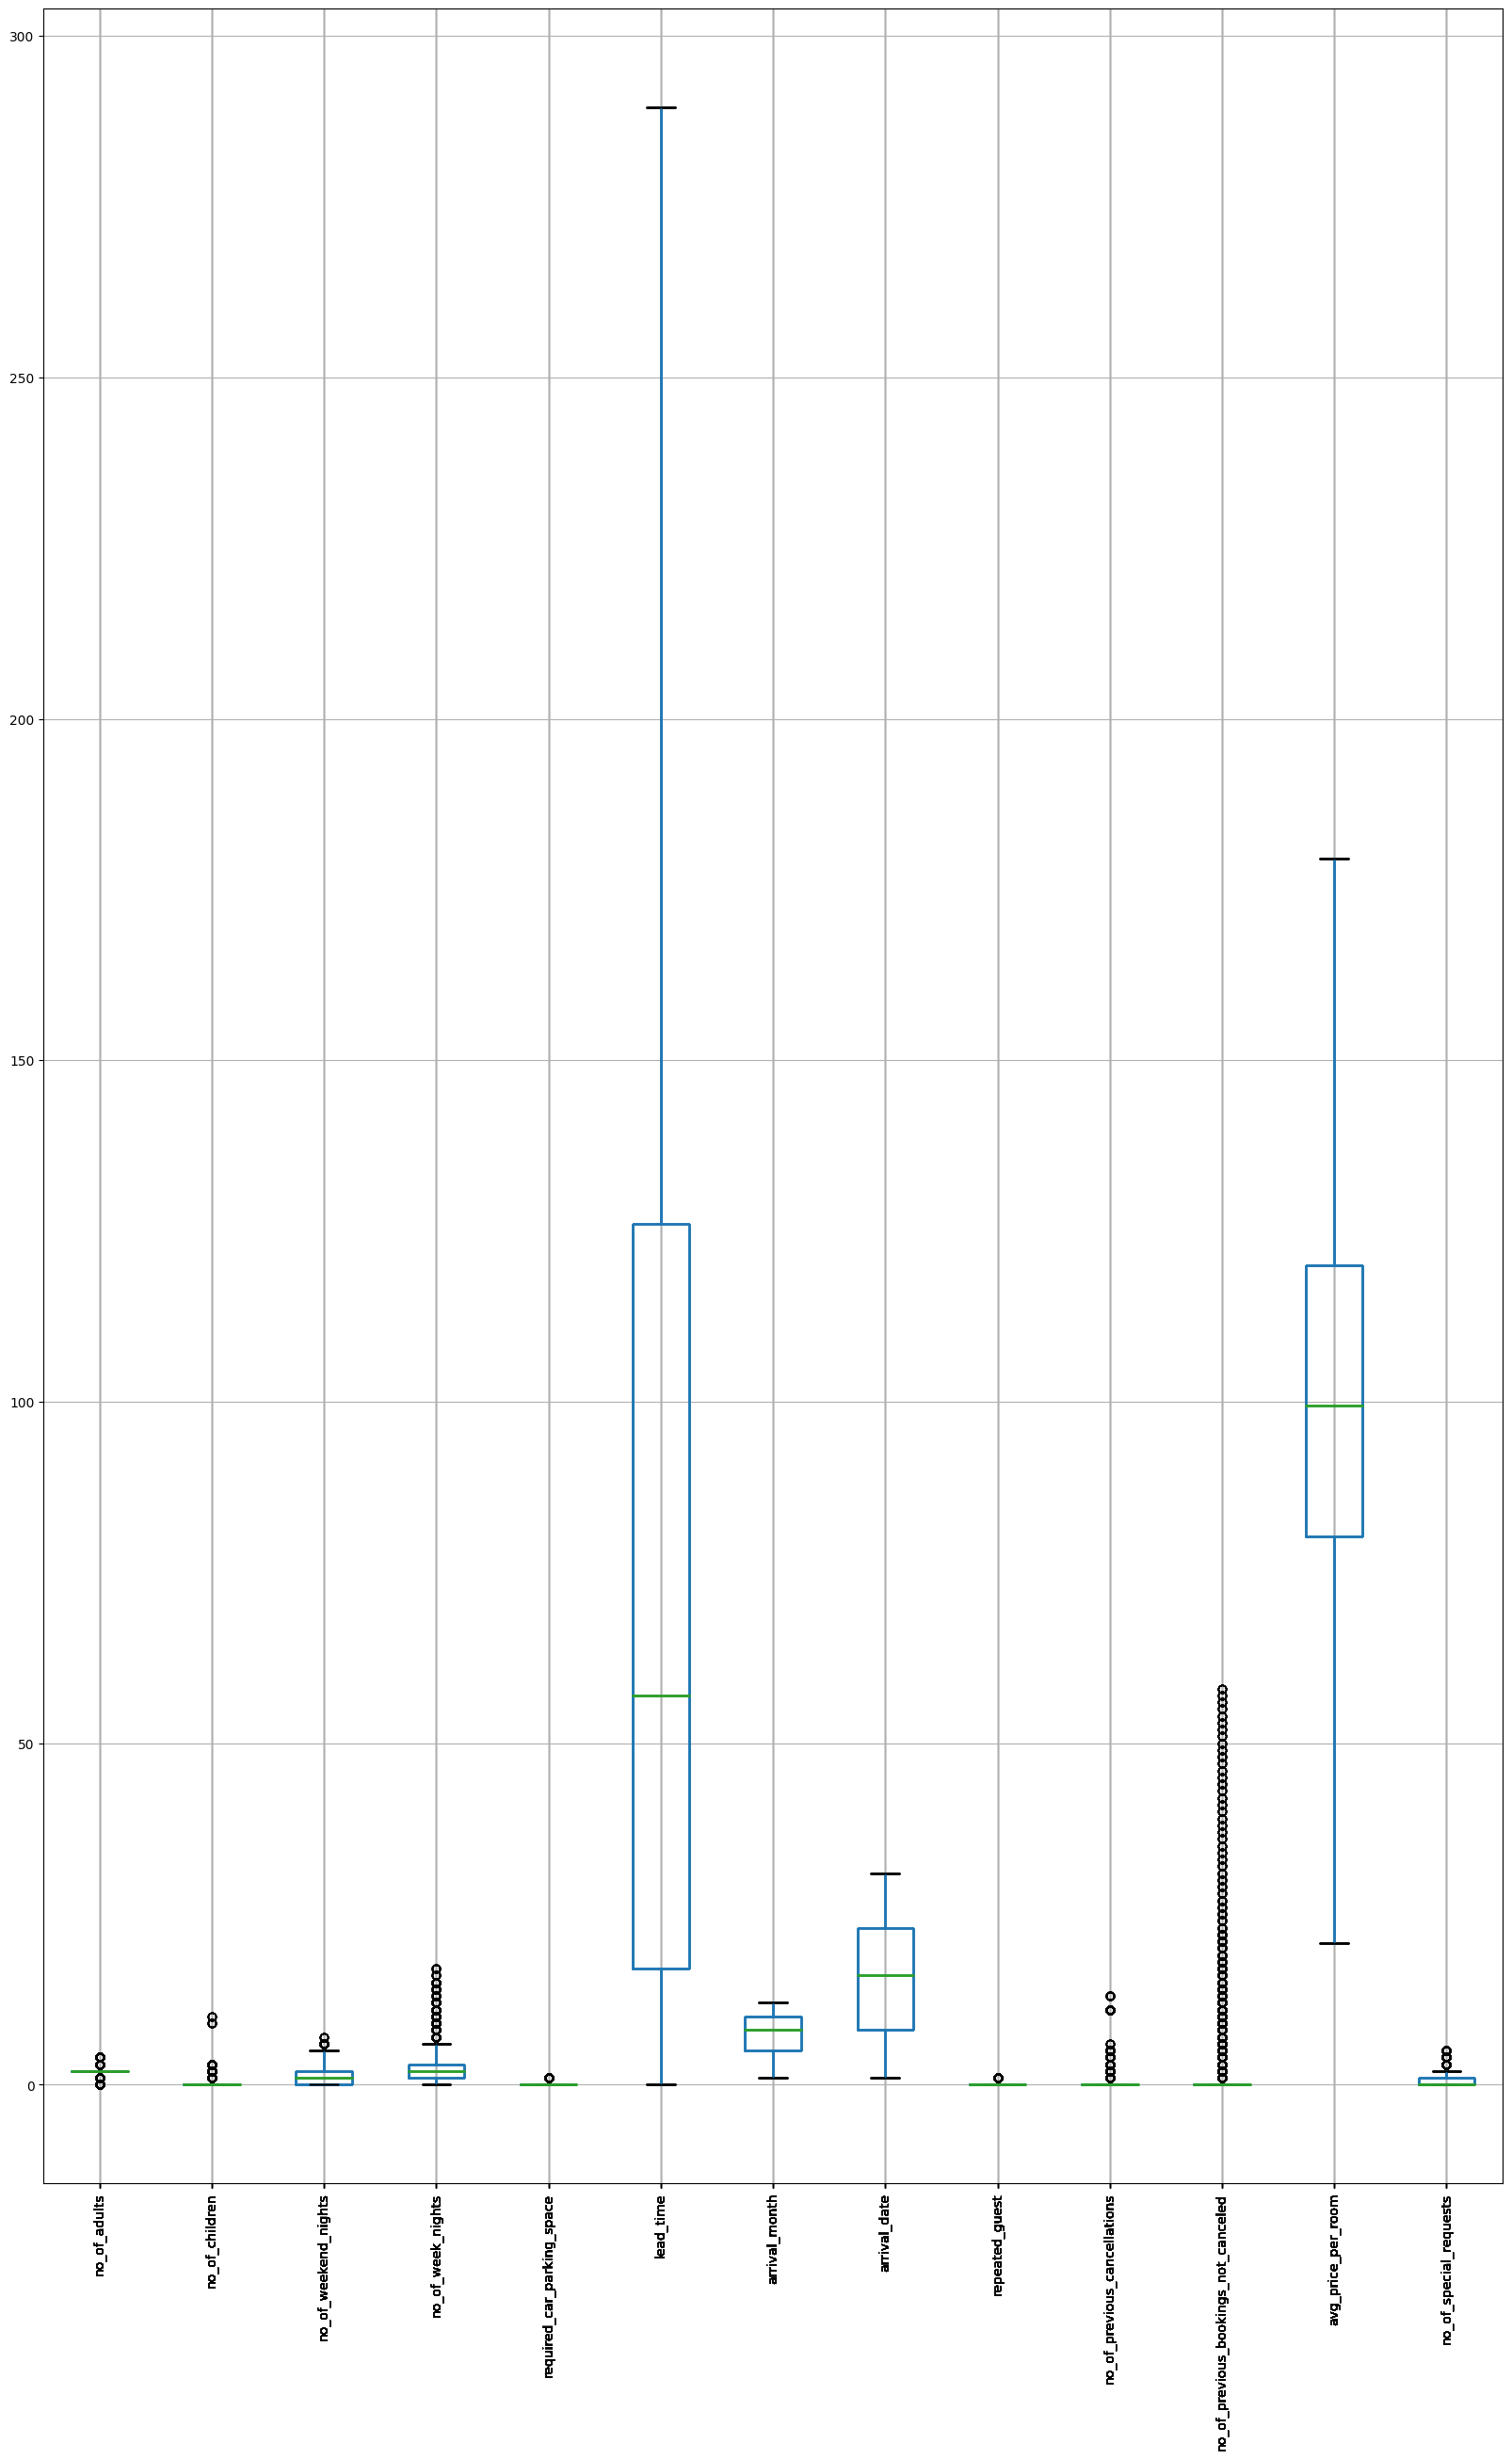

In [ ]:
#Rechecking the outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    inn_data.boxplot()
plt.xticks(rotation=90)
plt.show()

Feature Engineering

deviding the data into Training data, validation data and testing data

In [ ]:
training_val_data, testing_data = train_test_split(inn_data, test_size=0.2, random_state=42)
training_data, val_data = train_test_split(training_val_data, test_size=0.25, random_state=42)

In [ ]:
inn_data.shape

(36275, 17)

60% of the data will be be used to train the model while 20% to validate and 20% to test the model

the shape of the dataset are as below

In [ ]:
print('training_data.shape :', training_data.shape)
print('val_data.shape :', val_data.shape)
print('testing_data.shape :', testing_data.shape)

training_data.shape : (21765, 17)
val_data.shape : (7255, 17)
testing_data.shape : (7255, 17)


The training dataset contains 21765 data points why testing and validation dataset contains 7255 data points each

Identifying input and Target Column

In [ ]:
target_column = 'booking_status'
input_columns = list(training_data.columns)[0:-1]

veiwing the input columns

In [ ]:
print(input_columns)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


**Creating inputs and targets for the training, validation and test sets for processing and model training.**

In [ ]:
training_inputs = training_data[input_columns].copy()
training_targets = training_data[target_column].copy()

In [ ]:
val_inputs = val_data[input_columns].copy()
val_targets = val_data[target_column].copy()

In [ ]:
testing_inputs = testing_data[input_columns].copy()
testing_targets = testing_data[target_column].copy()

Let's view the Training dataset and Target

In [ ]:
training_inputs

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
16474,2,0,0,1,Meal Plan 2,0,Room_Type 1,55.0,4,6,Offline,0,0,0,104.00,0
26660,1,0,0,3,Meal Plan 1,0,Room_Type 1,271.0,9,21,Offline,0,0,0,85.67,0
2433,2,0,0,5,Meal Plan 2,0,Room_Type 1,230.0,9,6,Online,0,0,0,137.00,0
5612,2,0,1,2,Not Selected,0,Room_Type 1,23.0,10,17,Online,0,0,0,119.00,3
34484,2,0,1,2,Not Selected,1,Room_Type 1,4.0,11,6,Online,0,0,0,104.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,2,2,1,2,Meal Plan 1,0,Room_Type 6,47.0,4,15,Online,0,0,0,173.12,2
17814,1,0,2,1,Meal Plan 1,0,Room_Type 1,20.0,2,7,Online,0,0,0,86.00,2
27346,1,0,0,3,Meal Plan 1,0,Room_Type 1,9.0,3,1,Online,0,0,0,71.84,1
30983,2,1,0,3,Meal Plan 1,0,Room_Type 4,83.0,7,28,Online,0,0,0,141.10,1


In [ ]:
training_targets

16474    Not_Canceled
26660    Not_Canceled
2433         Canceled
5612     Not_Canceled
34484    Not_Canceled
             ...     
25355    Not_Canceled
17814    Not_Canceled
27346    Not_Canceled
30983    Not_Canceled
25868        Canceled
Name: booking_status, Length: 21765, dtype: object

In [ ]:
val_inputs

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15198,1,0,0,3,Meal Plan 1,0,Room_Type 1,58.0,1,27,Offline,0,0,0,81.00,0
10571,3,0,1,0,Meal Plan 1,0,Room_Type 4,103.0,10,9,Online,0,0,0,151.20,0
22722,2,0,0,2,Meal Plan 1,0,Room_Type 1,289.5,12,2,Offline,0,0,0,52.00,0
746,3,0,0,4,Meal Plan 2,0,Room_Type 1,65.0,12,21,Offline,0,0,0,122.65,0
11548,3,0,0,2,Meal Plan 1,0,Room_Type 4,179.0,10,7,Online,0,0,0,141.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,2,0,0,3,Meal Plan 1,0,Room_Type 4,17.0,8,24,Online,0,0,0,165.00,1
7011,3,0,0,1,Meal Plan 1,0,Room_Type 4,41.0,9,1,Online,0,0,0,142.20,2
17864,2,0,1,2,Meal Plan 1,0,Room_Type 1,289.5,11,4,Offline,0,0,0,89.00,0
15876,2,0,1,4,Meal Plan 1,0,Room_Type 1,26.0,3,7,Offline,0,0,0,87.00,0


In [ ]:
testing_inputs

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
4968,2,1,1,0,Meal Plan 1,0,Room_Type 1,3.0,8,23,Online,0,0,0,90.00,3
34540,2,0,1,2,Meal Plan 1,0,Room_Type 4,9.0,2,12,Offline,0,0,0,48.67,0
36108,2,0,2,2,Meal Plan 1,0,Room_Type 1,24.0,12,25,Online,0,0,0,95.20,1
1553,2,0,0,3,Meal Plan 1,0,Room_Type 1,23.0,6,21,Online,0,0,0,127.67,0
24974,2,1,0,2,Meal Plan 1,0,Room_Type 4,9.0,9,8,Online,0,0,0,179.55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35781,2,0,0,3,Meal Plan 1,0,Room_Type 1,190.0,11,3,Online,0,0,0,90.90,0
12257,2,0,0,2,Meal Plan 1,0,Room_Type 4,0.0,6,17,Offline,0,0,0,90.95,1
27212,2,0,0,2,Meal Plan 1,0,Room_Type 1,30.0,6,2,Offline,0,0,0,140.00,0
28097,2,0,1,2,Meal Plan 1,0,Room_Type 1,39.0,3,14,Offline,0,0,0,85.00,0


In [ ]:
val_targets

15198    Not_Canceled
10571        Canceled
22722    Not_Canceled
746      Not_Canceled
11548        Canceled
             ...     
7207     Not_Canceled
7011     Not_Canceled
17864        Canceled
15876    Not_Canceled
30408    Not_Canceled
Name: booking_status, Length: 7255, dtype: object

In [ ]:
testing_targets

4968     Not_Canceled
34540    Not_Canceled
36108    Not_Canceled
1553         Canceled
24974    Not_Canceled
             ...     
35781        Canceled
12257    Not_Canceled
27212    Not_Canceled
28097    Not_Canceled
6556     Not_Canceled
Name: booking_status, Length: 7255, dtype: object

####Extracting numerical and categorical columns


In [ ]:
numeric_columns = training_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_columns = training_inputs.select_dtypes('object').columns.tolist()

viewing the numeric and categorical columns

In [ ]:
categorical_columns

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [ ]:
numeric_columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

let us view the training, testing and validation data based on the numeric and categorical columns

In [ ]:
training_inputs[numeric_columns].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000
mean,1.840937,0.107466,0.798530,2.201286,0.032575,83.893407,7.417781,15.615346,0.026005,0.021916,0.158465,103.041879,0.616586
std,0.522219,0.407815,0.867842,1.403175,0.177526,81.719556,3.066231,8.742539,0.159154,0.343002,1.837454,31.937465,0.784763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.750000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.490000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.700000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,289.500000,12.000000,31.000000,1.000000,13.000000,58.000000,179.550000,5.000000


In [ ]:
training_inputs[categorical_columns].nunique()

type_of_meal_plan      4
room_type_reserved     7
market_segment_type    5
dtype: int64

In [ ]:
testing_inputs[numeric_columns].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000
mean,1.847691,0.101172,0.822329,2.213232,0.027154,83.133425,7.452240,15.590076,0.025086,0.021227,0.148174,102.660575,0.618608
std,0.518835,0.391483,0.880664,1.442928,0.162542,81.792747,3.108976,8.742233,0.156398,0.335956,1.656450,31.441366,0.785842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.750000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,16.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.005000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,56.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,124.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,3.000000,7.000000,17.000000,1.000000,289.500000,12.000000,31.000000,1.000000,11.000000,54.000000,179.550000,4.000000


In [ ]:
testing_inputs[categorical_columns].nunique()

type_of_meal_plan      4
room_type_reserved     7
market_segment_type    5
dtype: int64

In [ ]:
val_inputs[numeric_columns].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000,7255.000000
mean,1.854307,0.102826,0.835700,2.204411,0.030048,83.995107,7.412681,15.548863,0.025086,0.029773,0.143487,103.064673,0.629910
std,0.507865,0.398040,0.868382,1.401772,0.170732,81.340492,3.041674,8.733395,0.156398,0.460991,1.585433,31.146169,0.791054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.750000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,18.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.950000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,129.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,9.000000,6.000000,16.000000,1.000000,289.500000,12.000000,31.000000,1.000000,13.000000,52.000000,179.550000,5.000000


####Let's Scale Numerical Features

To ensure no particular feature has a disproportionate impact on the model. We need to scale the numeric features 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(inn_data[numeric_columns])

MinMaxScaler()

Let's view the minimum value for each column

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 20.749999999999993,
 0.0]

Let's view the maximum value for each column

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[4.0, 10.0, 7.0, 17.0, 1.0, 289.5, 12.0, 31.0, 1.0, 13.0, 58.0, 179.55, 5.0]

scaling the training, validation and test sets seperately using the transform method of scaler.



In [ ]:
training_inputs[numeric_columns] = scaler.transform(training_inputs[numeric_columns])
val_inputs[numeric_columns] = scaler.transform(val_inputs[numeric_columns])
testing_inputs[numeric_columns] = scaler.transform(testing_inputs[numeric_columns])

Let's check

In [ ]:
training_inputs[numeric_columns].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000,21765.000000
mean,0.460234,0.010747,0.114076,0.129487,0.032575,0.289787,0.583435,0.487178,0.026005,0.001686,0.002732,0.518211,0.123317
std,0.130555,0.040781,0.123977,0.082540,0.177526,0.282278,0.278748,0.291418,0.159154,0.026385,0.031680,0.201118,0.156953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.058824,0.000000,0.058722,0.363636,0.233333,0.000000,0.000000,0.000000,0.375000,0.000000
50%,0.500000,0.000000,0.142857,0.117647,0.000000,0.200345,0.636364,0.500000,0.000000,0.000000,0.000000,0.495844,0.000000
75%,0.500000,0.000000,0.285714,0.176471,0.000000,0.435233,0.818182,0.733333,0.000000,0.000000,0.000000,0.629408,0.200000
max,1.000000,1.000000,0.857143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the numerical column has been scaled to have range of (0,1)

###Encoding the Categorical Data using one hot encoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
inn_data[categorical_columns]

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online
36271,Meal Plan 1,Room_Type 1,Online
36272,Meal Plan 1,Room_Type 1,Online
36273,Not Selected,Room_Type 1,Online


Let's fit the encoder accross all the categorical features of the dataset

In [ ]:
encoder.fit(inn_data[categorical_columns])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

The encoder has created a list of categories for each of the categorical columns in the dataset.

We can generate column names for each individual category using get_feature_names_out 

In [ ]:
encoder.categories_

[array(['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected'],
       dtype=object),
 array(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4',
        'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], dtype=object),
 array(['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online'],
       dtype=object)]

In [ ]:
coded_columns = list(encoder.get_feature_names_out(categorical_columns))
print(coded_columns)

['type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


All of the above columns will be added to train_inputs, val_inputs and test_inputs.

To perform the encoding, we use the transform method of encoder.

In [ ]:
training_inputs[coded_columns] = encoder.transform(training_inputs[categorical_columns])
val_inputs[coded_columns] = encoder.transform(val_inputs[categorical_columns])
testing_inputs[coded_columns] = encoder.transform(testing_inputs[categorical_columns])

Let's verify that the encoded has been added

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
training_inputs

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
16474,0.50,0.0,0.000000,0.058824,Meal Plan 2,0.0,Room_Type 1,0.189983,0.272727,0.166667,Offline,0.0,0.0,0.0,0.524244,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26660,0.25,0.0,0.000000,0.176471,Meal Plan 1,0.0,Room_Type 1,0.936097,0.727273,0.666667,Offline,0.0,0.0,0.0,0.408816,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2433,0.50,0.0,0.000000,0.294118,Meal Plan 2,0.0,Room_Type 1,0.794473,0.727273,0.166667,Online,0.0,0.0,0.0,0.732053,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5612,0.50,0.0,0.142857,0.117647,Not Selected,0.0,Room_Type 1,0.079447,0.818182,0.533333,Online,0.0,0.0,0.0,0.618703,0.6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34484,0.50,0.0,0.142857,0.117647,Not Selected,1.0,Room_Type 1,0.013817,0.909091,0.166667,Online,0.0,0.0,0.0,0.524244,0.2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,0.50,0.2,0.142857,0.117647,Meal Plan 1,0.0,Room_Type 6,0.162349,0.272727,0.466667,Online,0.0,0.0,0.0,0.959509,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17814,0.25,0.0,0.285714,0.058824,Meal Plan 1,0.0,Room_Type 1,0.069085,0.090909,0.200000,Online,0.0,0.0,0.0,0.410894,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27346,0.25,0.0,0.000000,0.176471,Meal Plan 1,0.0,Room_Type 1,0.031088,0.181818,0.000000,Online,0.0,0.0,0.0,0.321725,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30983,0.50,0.1,0.000000,0.176471,Meal Plan 1,0.0,Room_Type 4,0.286701,0.545455,0.900000,Online,0.0,0.0,0.0,0.757872,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
testing_inputs

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
4968,0.50,0.1,0.142857,0.000000,Meal Plan 1,0.0,Room_Type 1,0.010363,0.636364,0.733333,Online,0.0,0.0,0.0,0.436083,0.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34540,0.50,0.0,0.142857,0.117647,Meal Plan 1,0.0,Room_Type 4,0.031088,0.090909,0.366667,Offline,0.0,0.0,0.0,0.175819,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36108,0.50,0.0,0.285714,0.117647,Meal Plan 1,0.0,Room_Type 1,0.082902,1.000000,0.800000,Online,0.0,0.0,0.0,0.468829,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1553,0.50,0.0,0.000000,0.176471,Meal Plan 1,0.0,Room_Type 1,0.079447,0.454545,0.666667,Online,0.0,0.0,0.0,0.673300,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24974,0.50,0.1,0.000000,0.117647,Meal Plan 1,0.0,Room_Type 4,0.031088,0.727273,0.233333,Online,0.0,0.0,0.0,1.000000,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35781,0.50,0.0,0.000000,0.176471,Meal Plan 1,0.0,Room_Type 1,0.656304,0.909091,0.066667,Online,0.0,0.0,0.0,0.441751,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12257,0.50,0.0,0.000000,0.117647,Meal Plan 1,0.0,Room_Type 4,0.000000,0.454545,0.533333,Offline,0.0,0.0,0.0,0.442065,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27212,0.50,0.0,0.000000,0.117647,Meal Plan 1,0.0,Room_Type 1,0.103627,0.454545,0.033333,Offline,0.0,0.0,0.0,0.750945,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28097,0.50,0.0,0.142857,0.117647,Meal Plan 1,0.0,Room_Type 1,0.134715,0.181818,0.433333,Offline,0.0,0.0,0.0,0.404597,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
val_inputs

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
15198,0.25,0.0,0.000000,0.176471,Meal Plan 1,0.0,Room_Type 1,0.200345,0.000000,0.866667,Offline,0.0,0.0,0.0,0.379408,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10571,0.75,0.0,0.142857,0.000000,Meal Plan 1,0.0,Room_Type 4,0.355786,0.818182,0.266667,Online,0.0,0.0,0.0,0.821474,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22722,0.50,0.0,0.000000,0.117647,Meal Plan 1,0.0,Room_Type 1,1.000000,1.000000,0.033333,Offline,0.0,0.0,0.0,0.196788,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
746,0.75,0.0,0.000000,0.235294,Meal Plan 2,0.0,Room_Type 1,0.224525,1.000000,0.666667,Offline,0.0,0.0,0.0,0.641688,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11548,0.75,0.0,0.000000,0.117647,Meal Plan 1,0.0,Room_Type 4,0.618307,0.818182,0.200000,Online,0.0,0.0,0.0,0.759131,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,0.50,0.0,0.000000,0.176471,Meal Plan 1,0.0,Room_Type 4,0.058722,0.636364,0.766667,Online,0.0,0.0,0.0,0.908375,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7011,0.75,0.0,0.000000,0.058824,Meal Plan 1,0.0,Room_Type 4,0.141623,0.727273,0.000000,Online,0.0,0.0,0.0,0.764798,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17864,0.50,0.0,0.142857,0.117647,Meal Plan 1,0.0,Room_Type 1,1.000000,0.909091,0.100000,Offline,0.0,0.0,0.0,0.429786,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15876,0.50,0.0,0.142857,0.235294,Meal Plan 1,0.0,Room_Type 1,0.089810,0.181818,0.200000,Offline,0.0,0.0,0.0,0.417191,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


From the tables above the encoded data has been added

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

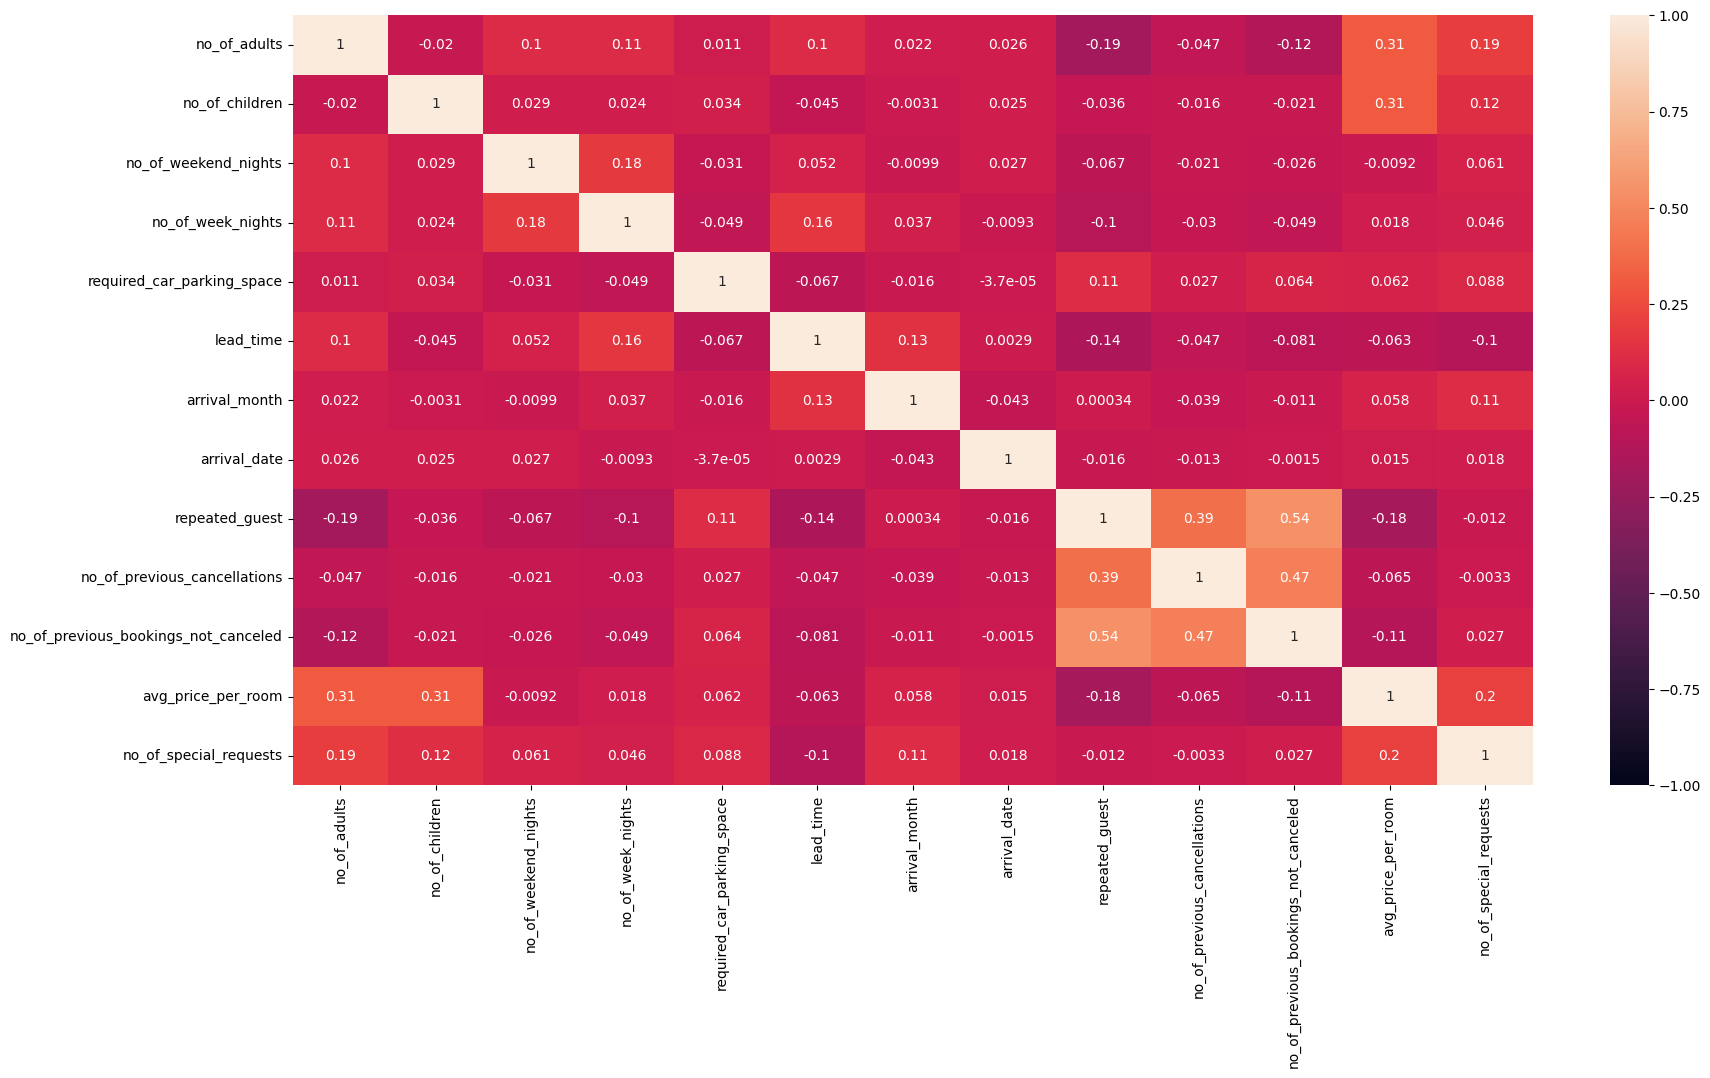

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(
inn_data.corr(), annot=True, vmin=-1, vmax=1)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
#plot color scaled correlation matrix
corr=inn_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.101880,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.307348,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.045283,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.306288,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.051995,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.009230,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.159253,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.018295,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066819,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061978,0.087922
lead_time,0.101880,-0.045283,0.051995,0.159253,-0.066819,1.000000,0.134083,0.002899,-0.141013,-0.047332,-0.080651,-0.063217,-0.102018
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.134083,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.058202,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.002899,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.014522,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.141013,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.176801,-0.011820
no_of_previous_cancellations,-0.047426,-0.016390,-0.020690,-0.030080,0.027106,-0.047332,-0.038615,-0.012542,0.390810,1.000000,0.468147,-0.065158,-0.003317


looking at the correlatoin above, there is not much multicollinearity in the data. the highest correlation is just 0.3 

## Building a Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_model = LogisticRegression(solver='liblinear')

In fitting the model
we are going to replace the categorical columns with the coded columns

In [ ]:
logit_model.fit(training_inputs[numeric_columns + coded_columns], training_targets)

LogisticRegression(solver='liblinear')

In [ ]:
print(numeric_columns + coded_columns)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


The weights of all the columns are shown below 

In [ ]:
print(logit_model.coef_.tolist())

[[-0.48618037884534077, -0.9864444277409073, -0.91792070181881, -0.5752619925111203, 1.6158905173912095, -4.744255612359054, 0.6805264314535996, -0.049424948888624705, 1.648644773449367, -0.5967440063977096, 0.15446901670363689, -3.226859422608673, 7.199975244759447, 1.0068264113120247, 0.8429241074671641, -0.3480996318100527, 0.6886523050235644, -0.051599708135646585, 0.3527855471167764, 0.01552451130097696, 0.20777945069711098, 0.4457849094509116, 0.5786026366922872, 0.6414258448735468, -0.8000962536530504, 1.7930432576566013, 0.35385821986192584, 1.2959767108412164, -0.45247874273299055]]


The higher the weight, the greater the impact of the column on the prediction.

In [ ]:
print(logit_model.intercept_)

[2.19030319]


### Making Prediction with the model

In [ ]:
X_train = training_inputs[numeric_columns + coded_columns]
X_val = val_inputs[numeric_columns + coded_columns]
X_test = testing_inputs[numeric_columns + coded_columns]

In [ ]:
training_preds = logit_model.predict(X_train)

Prediction output of the model are as below

In [ ]:
training_preds

array(['Not_Canceled', 'Canceled', 'Canceled', ..., 'Not_Canceled',
       'Not_Canceled', 'Not_Canceled'], dtype=object)

The target

In [ ]:
training_targets

16474    Not_Canceled
26660    Not_Canceled
2433         Canceled
5612     Not_Canceled
34484    Not_Canceled
             ...     
25355    Not_Canceled
17814    Not_Canceled
27346    Not_Canceled
30983    Not_Canceled
25868        Canceled
Name: booking_status, Length: 21765, dtype: object

The probabilities of the prediction is shown below

In [ ]:
train_probs = logit_model.predict_proba(X_train)
train_probs

array([[0.17008197, 0.82991803],
       [0.74646583, 0.25353417],
       [0.97147019, 0.02852981],
       ...,
       [0.05478149, 0.94521851],
       [0.38457862, 0.61542138],
       [0.19380645, 0.80619355]])

In [ ]:
logit_model.classes_

array(['Canceled', 'Not_Canceled'], dtype=object)

## Model performance evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(training_targets, training_preds)

0.8005053985756949

The accuracy of the model is 80.1% on the training dataset

## Final Model Summary

Let us use confusion matrix to classify the predicton

In [ ]:
confusion_matrix(training_targets, training_preds, normalize='true')

array([[0.61409729, 0.38590271],
       [0.11016719, 0.88983281]])

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = logit_model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 80.05%


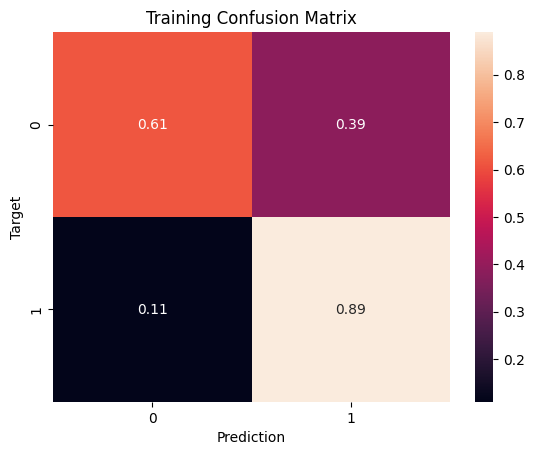

In [ ]:
training_preds = predict_and_plot(X_train, training_targets, 'Training')

Let us test the model on the Validation and test dataset

Accuracy: 79.89%


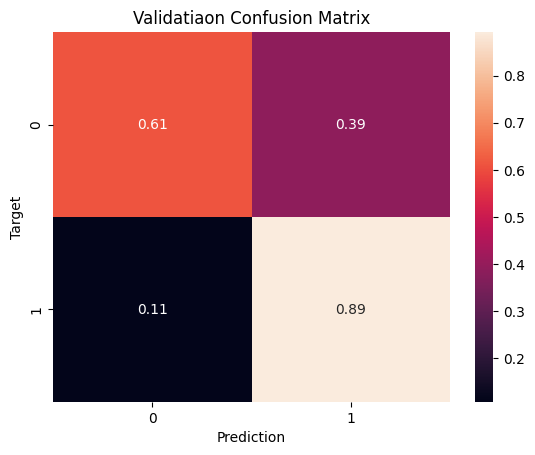

In [ ]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 80.14%


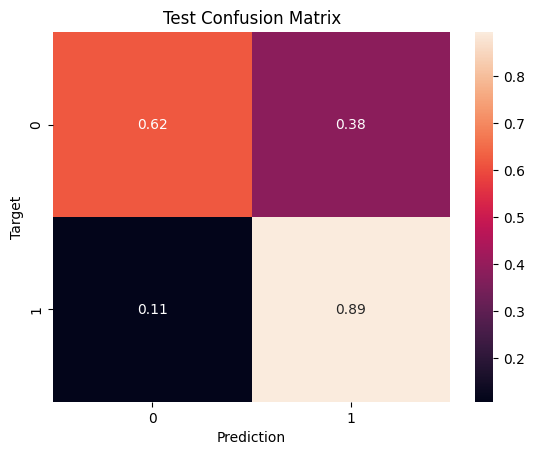

In [ ]:
test_preds = predict_and_plot(X_test, testing_targets, 'Test')

The model achieve an accuracy on both the validation(79.89%) and test dataset(80.14%) which means our model generalize well with unfamiliar dataset.

## Building a Decision Tree model

The Decision tree model

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

In [ ]:
tree_model.fit(X_train, training_targets)

DecisionTreeClassifier(random_state=42)

Let's use accuracy score to evaluate the decision tree model

In [ ]:
tree_train_preds = tree_model.predict(X_train)

In [ ]:
tree_train_preds

array(['Not_Canceled', 'Not_Canceled', 'Canceled', ..., 'Not_Canceled',
       'Not_Canceled', 'Canceled'], dtype=object)

In [ ]:
pd.value_counts(tree_train_preds)

Not_Canceled    14722
Canceled         7043
dtype: int64

In [ ]:
tree_train_probs = tree_model.predict_proba(X_train)

In [ ]:
tree_train_probs

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [ ]:
accuracy_score(training_targets, tree_train_preds)

0.9943946703422927

The model give accuracy of 99.4% on the training data

In [ ]:
tree_model.score(X_val, val_targets)

0.8599586492074431

it give the accuracy of 85.9% on the validation data, the model overfit

In [ ]:
val_targets.value_counts() / len(val_targets)

Not_Canceled    0.666713
Canceled        0.333287
Name: booking_status, dtype: float64

The model has memorize the training data and didn't generalize well on the validation data. this is overfitting

Visualize

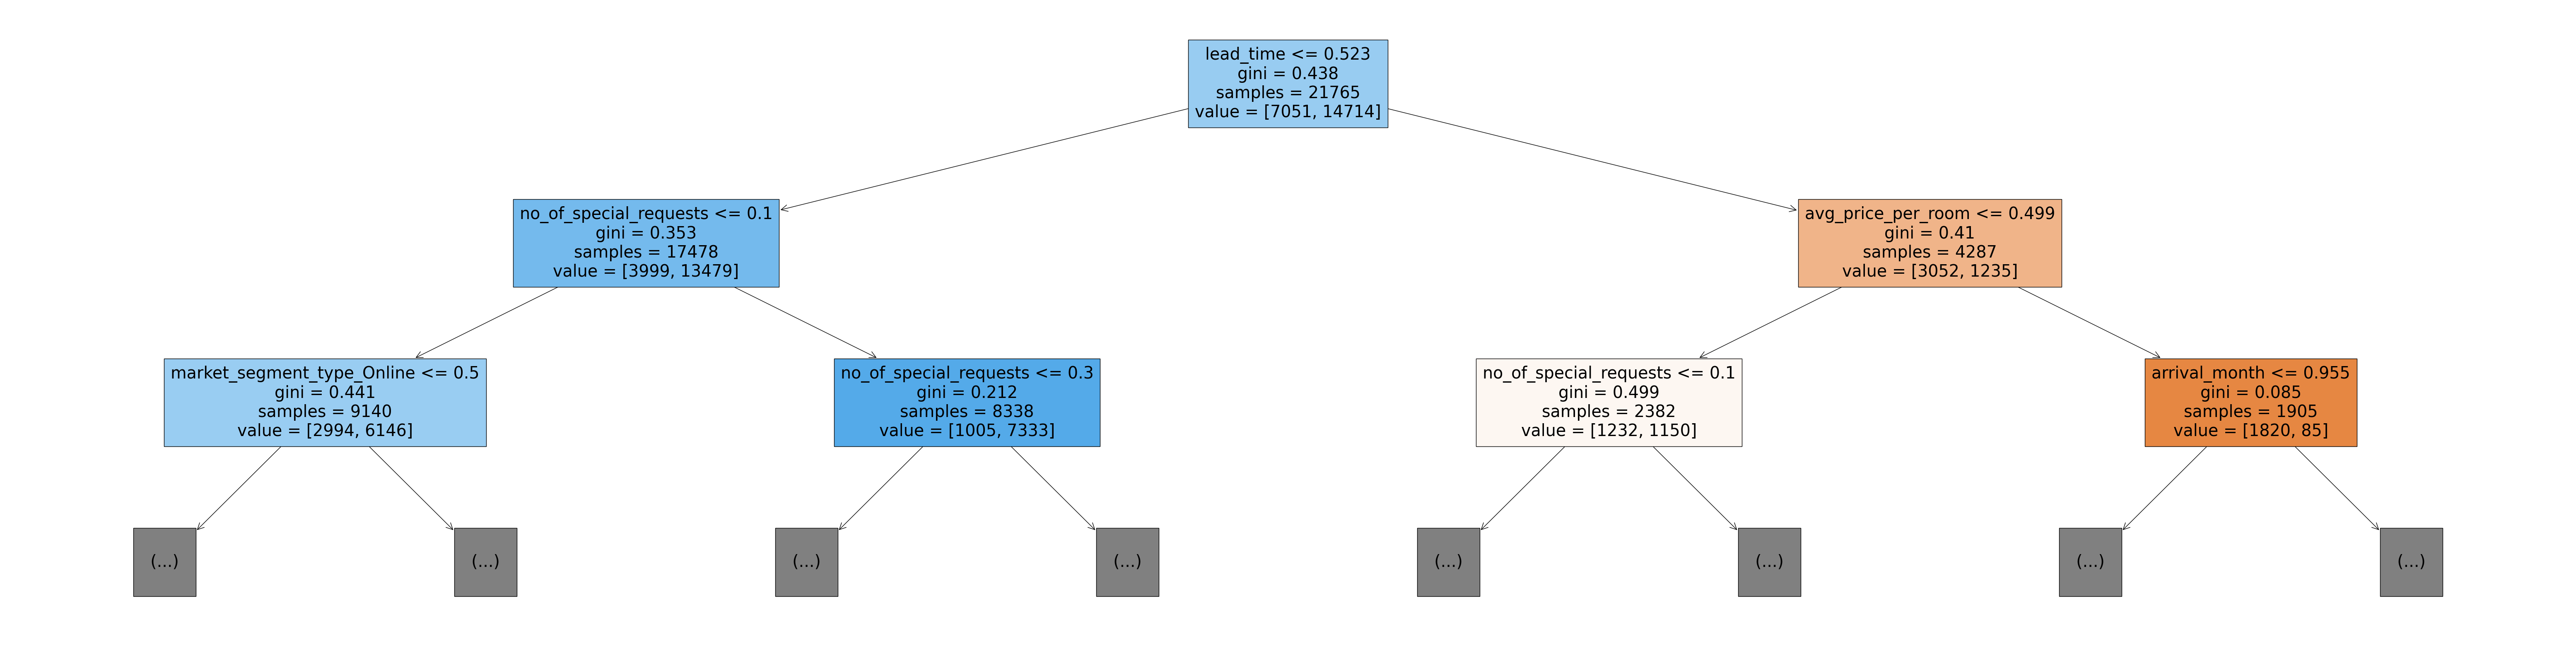

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(tree_model, feature_names=X_train.columns, max_depth=2, filled=True);

checking the depth of the tree created

In [ ]:
tree_model.tree_.max_depth

35

Displaying the tree as text for deeper analysis

In [ ]:
tree_text = export_text(tree_model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- lead_time <= 0.52
|   |--- no_of_special_requests <= 0.10
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 0.32
|   |   |   |   |--- no_of_weekend_nights <= 0.07
|   |   |   |   |   |--- avg_price_per_room <= 0.99
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Aviation <= 0.50
|   |   |   |   |   |   |   |   |--- lead_time <= 0.31
|   |   |   |   |   |   |   |   |   |--- class: Not_Canceled
|   |   |   |   |   |   |   |   |--- lead_time >  0.31
|   |   |   |   |   |   |   |   |   |--- arrival_month <= 0.27
|   |   |   |   |   |   |   |   |   |   |--- class: Canceled
|   |   |   |   |   |   |   |   |   |--- arrival_month >  0.27
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 0.59
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- arrival_month >  0.59
|   |   |   |   |   |   |   |   |   |   |   |-

Let us look at the important value the tree assign to each feature

In [ ]:
tree_model.feature_importances_

array([2.76036132e-02, 5.82372821e-03, 3.23994182e-02, 4.86868733e-02,
       6.46766831e-03, 3.53187561e-01, 6.95175074e-02, 8.90706642e-02,
       4.66003948e-04, 9.49110309e-05, 1.42272946e-04, 1.72173268e-01,
       7.01032590e-02, 5.51957252e-03, 3.47423823e-03, 1.77841182e-04,
       4.36120662e-03, 5.56208262e-03, 1.35747171e-03, 0.00000000e+00,
       6.35840491e-03, 9.85978862e-04, 7.07872023e-04, 2.33538023e-04,
       3.13817009e-04, 0.00000000e+00, 1.06072298e-03, 2.48880709e-03,
       9.16616968e-02])

let's turn it into a table

In [ ]:
importance_table = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_table

,feature,importance
5,lead_time,0.353188
11,avg_price_per_room,0.172173
28,market_segment_type_Online,0.091662
7,arrival_date,0.089071
12,no_of_special_requests,0.070103
6,arrival_month,0.069518
3,no_of_week_nights,0.048687
2,no_of_weekend_nights,0.032399
0,no_of_adults,0.027604
4,required_car_parking_space,0.006468


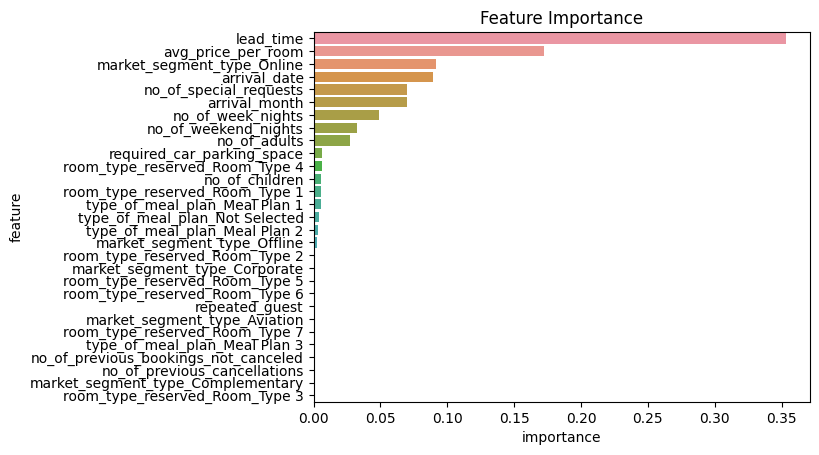

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_table, x='importance', y='feature');

##Hyperparameter Tuning

Let's do regularisation on the dataset to remove overfitting by reducing the max depth to 3.

In [ ]:
tree_model_2 = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
tree_model_2.fit(X_train, training_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

let's compute the accuracy score again

In [ ]:
tree_model_2.score(X_train, training_targets)

0.7856650585802895

In [ ]:
tree_model_2.score(X_val, val_targets)

0.7924190213645762

The accuracy score of the model on the training data and validation data is now close

In [ ]:
tree_model_2.classes_

array(['Canceled', 'Not_Canceled'], dtype=object)

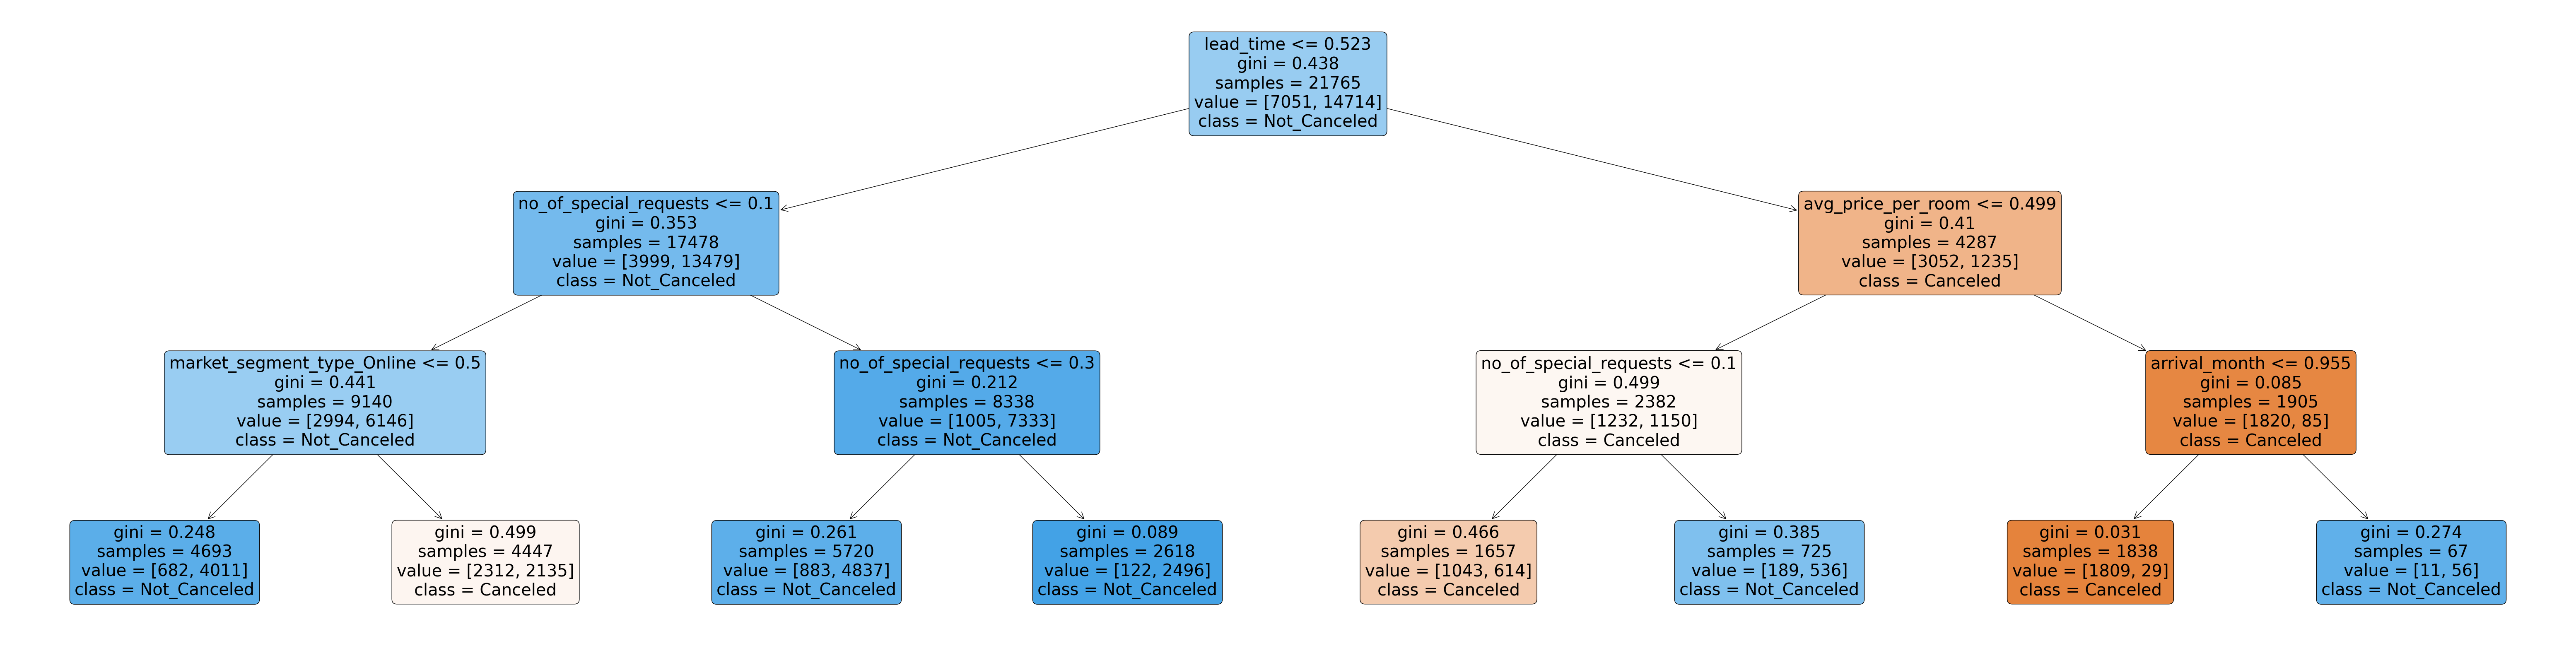

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(tree_model_2, feature_names=X_train.columns, filled=True, rounded=True, class_names=tree_model_2.classes_);

In [ ]:
print(export_text(tree_model_2, feature_names=list(X_train.columns)))

|--- lead_time <= 0.52
|   |--- no_of_special_requests <= 0.10
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- class: Not_Canceled
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- class: Canceled
|   |--- no_of_special_requests >  0.10
|   |   |--- no_of_special_requests <= 0.30
|   |   |   |--- class: Not_Canceled
|   |   |--- no_of_special_requests >  0.30
|   |   |   |--- class: Not_Canceled
|--- lead_time >  0.52
|   |--- avg_price_per_room <= 0.50
|   |   |--- no_of_special_requests <= 0.10
|   |   |   |--- class: Canceled
|   |   |--- no_of_special_requests >  0.10
|   |   |   |--- class: Not_Canceled
|   |--- avg_price_per_room >  0.50
|   |   |--- arrival_month <= 0.95
|   |   |   |--- class: Canceled
|   |   |--- arrival_month >  0.95
|   |   |   |--- class: Not_Canceled



In [ ]:
# To compute max_depth and it errors
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, training_targets)
    train_acc = 1 - model.score(X_train, training_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [ ]:
errors

,Max Depth,Training Error,Validation Error
0,1,0.240478,0.242178
1,2,0.240478,0.242178
2,3,0.214335,0.207581
3,4,0.180106,0.176292
4,5,0.168160,0.164990
5,6,0.154193,0.152584
6,7,0.142063,0.145693
7,8,0.131266,0.136595
8,9,0.120193,0.134114
9,10,0.111188,0.125982


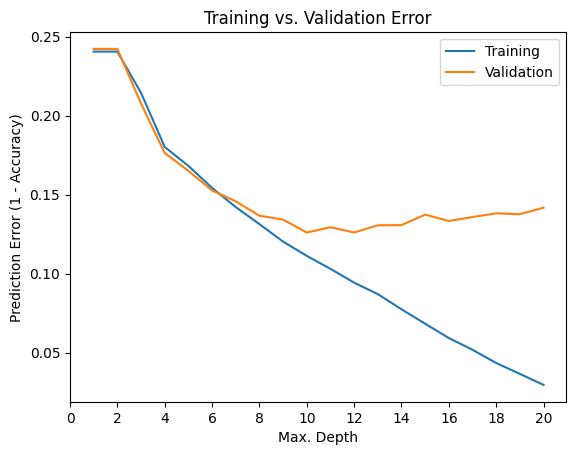

In [ ]:
plt.figure()
plt.plot(errors['Max Depth'], errors['Training Error'])
plt.plot(errors['Max Depth'], errors['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

## Do we need to prune the tree?

Yes, we need to prune the model, Looking at the graph above, it appears that a maximum depth of 9 and 11 results in the lowest validation error.

let us use Max Depth of 9

In [ ]:
tree_model_3 = DecisionTreeClassifier(max_depth=9, random_state=42).fit(X_train, training_targets)
tree_model_3.score(X_val, val_targets)

0.8658855961405927

Let us also reduce the max_leaf nodes to 128

In [ ]:
tree_model_3 = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
tree_model_3.fit(X_train, training_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
tree_model_3.score(X_train, training_targets)

0.8811853893866299

In [ ]:
tree_model_3.score(X_val, val_targets)

0.8741557546519642

In [ ]:
tree_model_3.tree_.max_depth

15

In [ ]:
model_text = export_text(tree_model_3, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- lead_time <= 0.52
|   |--- no_of_special_requests <= 0.10
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 0.32
|   |   |   |   |--- no_of_weekend_nights <= 0.07
|   |   |   |   |   |--- avg_price_per_room <= 0.99
|   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |--- class: Not_Canceled
|   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |--- class: Not_Canceled
|   |   |   |   |   |--- avg_price_per_room >  0.99
|   |   |   |   |   |   |--- no_of_week_nights <= 0.15
|   |   |   |   |   |   |   |--- class: Not_Canceled
|   |   |   |   |   |   |--- no_of_week_nights >  0.15
|   |   |   |   |   |   |   |--- class: Canceled
|   |   |   |   |--- no_of_weekend_nights >  0.07
|   |   |   |   |   |--- lead_time <= 0.23
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.64
|   |   |   |   |   |   |   |--- arrival_month <= 0.77
|   |   |   |   |   |   |   |   |--- avg_p

## Model Performance Comparison and Conclusions

Let's recall all the models

In [ ]:
models = [logit_model, tree_model, tree_model_2, tree_model_3]

The  following is the perfomance of the models on the traning dataset

In [ ]:
from sklearn.metrics import classification_report
for model in models:
    model.fit(X_train, training_targets) 
    training_preds= model.predict(X_train) 
    accuracy= accuracy_score(training_targets, training_preds) 
    clf_report= classification_report(training_targets, training_preds) 
    print(clf_report) 
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print("\n")

              precision    recall  f1-score   support

    Canceled       0.73      0.61      0.67      7051
Not_Canceled       0.83      0.89      0.86     14714

    accuracy                           0.80     21765
   macro avg       0.78      0.75      0.76     21765
weighted avg       0.80      0.80      0.80     21765

The accuracy of model LogisticRegression is 0.80


              precision    recall  f1-score   support

    Canceled       0.99      0.99      0.99      7051
Not_Canceled       1.00      1.00      1.00     14714

    accuracy                           0.99     21765
   macro avg       0.99      0.99      0.99     21765
weighted avg       0.99      0.99      0.99     21765

The accuracy of model DecisionTreeClassifier is 0.99


              precision    recall  f1-score   support

    Canceled       0.65      0.73      0.69      7051
Not_Canceled       0.86      0.81      0.84     14714

    accuracy                           0.79     21765
   macro avg       0.7

The logistic regression has an accuracy score of 80%, the decision tree model befrore hyperparametric tunning has accuracy score of 99% later drop to 87% after hyperparametric tunning and pruning

The Performance of the models on test data is shown below

In [ ]:
from sklearn.metrics import classification_report
for model in models:
    model.fit(X_train, training_targets) 
    testing_preds= model.predict(X_test) 
    accuracy= accuracy_score(testing_targets, testing_preds) 
    clf_report= classification_report(testing_targets, testing_preds) 
    print(clf_report) 
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    print("\n")

              precision    recall  f1-score   support

    Canceled       0.74      0.62      0.67      2416
Not_Canceled       0.82      0.89      0.86      4839

    accuracy                           0.80      7255
   macro avg       0.78      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255

The accuracy of model LogisticRegression is 0.80


              precision    recall  f1-score   support

    Canceled       0.78      0.79      0.79      2416
Not_Canceled       0.90      0.89      0.89      4839

    accuracy                           0.86      7255
   macro avg       0.84      0.84      0.84      7255
weighted avg       0.86      0.86      0.86      7255

The accuracy of model DecisionTreeClassifier is 0.86


              precision    recall  f1-score   support

    Canceled       0.66      0.73      0.69      2416
Not_Canceled       0.86      0.81      0.83      4839

    accuracy                           0.78      7255
   macro avg       0.7

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* The top 3 most important variables that cause cancellations are lead time, special request and average price of the room. 
* As the lead time increases the number of calcelation decreases.
* Introducing cancelation clause such as non refundable policy can help to prevent cancelation.
* Create more special package options for guest since bookings with special request are unlikely to be cancle
